
# <center>Project 1</center>

Venkat Sai Sri Harsha Tripuraneni

#1. Introduction

The ["Open Parking and Camera Violations"](https://data.cityofnewyork.us/City-Government Open-Parking-and-Camera-Violations/nc67-uf89) dataset contains information related to parking and camera violations, including details such as state, license type, issue date, violation time, violation type, fine amount, penalty amount, payment amount, amount due, county, and issuing agency. This dataset provides an opportunity to gain insights into parking and camera violations, potentially helping to optimize traffic enforcement, improve compliance, and enhance the overall parking and traffic management system.

**Research Questions**

1. Which states or regions have the highest number of parking and camera violations?

2. Are there significant differences in violation frequencies among different issuing agencies?

3. Are there any noticeable trends in violation occurrences over time?

4. What are the most common types of parking and camera violations?

5. Do specific violation types tend to be associated with higher charges?

6. What is the average payment amount, and amount due for these violations?






#2. Data Summary

Data set is taken from NYC Open Data.

Data set contains 1000 records and 19 columns.

1. Plate : Vehicle plate number
2. State : State where violation took place
3. License Type : type of license
4. Summons Number : Violation number to identify each violation
5. Issue Date : Date on which violation took place
6. Violation Time : time at which violation took place
7. Violation : Type of violation
8. Judgment Entry Date : Date of hearing by judge
9. Fine Amount : Fine that need to be paid
10. Penalty Amount : Penality
11. Interest Amount : interest on levied amount
12. Reduction Amount : reductions in any amount
13. Payment Amount : Total amount to be paid
14. Amount Due : Due amount
15. Precinct : DIstrict code
16. County : County name
17. Issuing Agency : Issuing authority or agency
18. Violation Status : Status of the violation
19. Summons Image : Images of the violation incident

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing data from using the API endpoint
data = pd.read_csv("https://raw.githubusercontent.com/Tripuraneni-Harsha/Python-Project-Assignment/main/mydata.csv")
#displaying the first 5 rows of the data
data.head()
#API ENDPOINT : https://data.cityofnewyork.us/resource/nc67-uf89.json

,Unnamed: 0,plate,state,license_type,summons_number,issue_date,violation_time,violation,judgment_entry_date,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,violation_status,summons_image
0,0,HLE3337,NY,PAS,8538415311,06/12/2017,11:16A,NO PARKING-STREET CLEANING,NaN,45.0,0.0,0.0,0.0,45.0,0.0,79.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,1,GZY4125,NY,PAS,8538415347,06/12/2017,11:22A,NO PARKING-STREET CLEANING,NaN,45.0,0.0,0.0,0.0,45.0,0.0,79.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,2,CVU5153,NY,PAS,8564406226,06/06/2017,08:57A,INSP. STICKER-EXPIRED/MISSING,NaN,65.0,0.0,0.0,0.0,65.0,0.0,102.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,3,43091PC,NY,COM,8478810950,03/27/2017,11:52A,FAIL TO DISP. MUNI METER RECPT,NaN,65.0,0.0,0.0,65.0,0.0,0.0,17.0,NY,TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,4,EKV2011,NY,PAS,7283436182,11/30/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...


In [2]:
data.shape

(1000, 20)

In [3]:
#Displaying data types of all attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   plate                1000 non-null   object 
 2   state                1000 non-null   object 
 3   license_type         1000 non-null   object 
 4   summons_number       1000 non-null   int64  
 5   issue_date           1000 non-null   object 
 6   violation_time       938 non-null    object 
 7   violation            938 non-null    object 
 8   judgment_entry_date  56 non-null     object 
 9   fine_amount          938 non-null    float64
 10  penalty_amount       938 non-null    float64
 11  interest_amount      938 non-null    float64
 12  reduction_amount     938 non-null    float64
 13  payment_amount       938 non-null    float64
 14  amount_due           938 non-null    float64
 15  precinct             938 non-null    fl

from the above data we can say that there were 18 attributes in the data set with different data types like float, integer and object(text).

#3. Exploratory Data Analysis (EDA)

To proceed with this section of the research, our initial steps involve conducting a summary statistics analysis for each of the variables, identifying any potential outliers or missing values that could influence our results. Following this, we will present graphical analyses for each attribute using both Matplotlib and Seaborn.

In [4]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing data from using the API endpoint
data = pd.read_csv("https://data.cityofnewyork.us/resource/nc67-uf89.csv")
#displaying the first 5 rows of the data
data.to_csv("mydata.csv")
data.head()

,plate,state,license_type,summons_number,issue_date,violation_time,violation,judgment_entry_date,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,violation_status,summons_image
0,812813F,TX,PAS,8612426017,08/27/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,GSG3115,NY,PAS,9028405288,01/07/2023,05:40P,NO STANDING-BUS STOP,NaN,115.0,0.0,0.0,0.0,115.0,0.0,102.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,2688496,IN,PAS,8742578152,08/06/2019,09:55A,DOUBLE PARKING,NaN,115.0,0.0,0.0,115.0,0.0,0.0,23.0,NY,TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,ALP3497,NY,PAS,8745478247,09/01/2019,01:54P,NO STANDING-EXC. TRUCK LOADING,NaN,95.0,0.0,0.0,0.0,95.0,0.0,19.0,NY,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,HTM9443,NY,PAS,8745478260,09/01/2019,02:40P,REG. STICKER-EXPIRED/MISSING,NaN,65.0,0.0,0.0,65.0,0.0,0.0,19.0,NY,TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...


In [5]:
#here I will drop some of the attributes that are not useful for my analysis
data.drop(['judgment_entry_date','fine_amount','penalty_amount','interest_amount','reduction_amount','precinct','violation_status','summons_image'],axis=1,inplace=True)

In [6]:
#data after dropping some attributes which are not in my scope of work
data

,plate,state,license_type,summons_number,issue_date,violation_time,violation,payment_amount,amount_due,county,issuing_agency
0,812813F,TX,PAS,8612426017,08/27/2018,NaN,NaN,NaN,NaN,NaN,NaN
1,GSG3115,NY,PAS,9028405288,01/07/2023,05:40P,NO STANDING-BUS STOP,115.00,0.0,Q,TRAFFIC
2,2688496,IN,PAS,8742578152,08/06/2019,09:55A,DOUBLE PARKING,0.00,0.0,NY,TRAFFIC
3,ALP3497,NY,PAS,8745478247,09/01/2019,01:54P,NO STANDING-EXC. TRUCK LOADING,95.00,0.0,NY,TRAFFIC
4,HTM9443,NY,PAS,8745478260,09/01/2019,02:40P,REG. STICKER-EXPIRED/MISSING,0.00,0.0,NY,TRAFFIC
...,...,...,...,...,...,...,...,...,...,...,...
995,JNW8106,NY,PAS,1472616881,11/06/2020,09:42A,BIKE LANE,115.00,0.0,K,POLICE DEPARTMENT
996,HHC2575,NY,PAS,1447403733,09/28/2020,11:40A,OBSTRUCTING DRIVEWAY,95.00,0.0,NY,POLICE DEPARTMENT
997,T724916C,NY,OMT,4024409918,06/03/2022,03:30P,BUS LANE VIOLATION,75.00,0.0,MN,DEPARTMENT OF TRANSPORTATION
998,KUJ3490,NY,PAS,4024421414,06/04/2022,08:48A,BUS LANE VIOLATION,75.04,0.0,QN,DEPARTMENT OF TRANSPORTATION


As we've successfully imported the data and removed the unwanted attributes from the data set, next step is to carefully inspect the dataset for any missing values. Identifying and handling null values is crucial, as they can potentially affect the integrity and reliability of our research findings.

In [7]:
#checking the count of null values in each attribute
data.isnull().sum()

plate              0
state              0
license_type       0
summons_number     0
issue_date         0
violation_time    18
violation         18
payment_amount    18
amount_due        18
county            19
issuing_agency    18
dtype: int64

According the above information dataset contains 10 missing values across the 5 columns namely violation_time,violation,payment_amount,amount_due,issuing_agencyand 15 missing values in county .As I am not intetested to remove the rows with missing data so I will fill the missing values with mean value if a attribute is numerical and mode value for categorical column.

In [8]:
#categorical attribute : filling missing values with mode value of that attribute
data['violation'].fillna(value=data['violation'].mode(), inplace=True)
data['county'].fillna(value=data['county'].mode(), inplace=True)
data['issuing_agency'].fillna(value=data['issuing_agency'].mode(), inplace=True)

#Numerical attribute : filling missing values with mean value of that attribute
data['payment_amount'].fillna(value=data['payment_amount'].mean(), inplace=True)
data['amount_due'].fillna(value=data['amount_due'].mean(), inplace=True)

In [9]:
#As datset has a date attribute lets convert its data type into date type
data['issue_date'] = pd.to_datetime(data['issue_date'])
print(data.dtypes)

plate                     object
state                     object
license_type              object
summons_number             int64
issue_date        datetime64[ns]
violation_time            object
violation                 object
payment_amount           float64
amount_due               float64
county                    object
issuing_agency            object
dtype: object


In [10]:
import calendar
#here I am getting the day, month and year parts from the date attribute and assign the names to the days and months using the calendar module
data['Day'] = data['issue_date'].dt.day.apply(lambda x: calendar.day_name[x % 7])
data['Month'] = data['issue_date'].dt.month.apply(lambda x: calendar.month_name[x])
data['Year'] = data['issue_date'].dt.year
data.head()

,plate,state,license_type,summons_number,issue_date,violation_time,violation,payment_amount,amount_due,county,issuing_agency,Day,Month,Year
0,812813F,TX,PAS,8612426017,2018-08-27,NaN,PHTO SCHOOL ZN SPEED VIOLATION,68.701415,0.0,Q,TRAFFIC,Sunday,August,2018
1,GSG3115,NY,PAS,9028405288,2023-01-07,05:40P,NO STANDING-BUS STOP,115.000000,0.0,Q,TRAFFIC,Monday,January,2023
2,2688496,IN,PAS,8742578152,2019-08-06,09:55A,DOUBLE PARKING,0.000000,0.0,NY,TRAFFIC,Sunday,August,2019
3,ALP3497,NY,PAS,8745478247,2019-09-01,01:54P,NO STANDING-EXC. TRUCK LOADING,95.000000,0.0,NY,TRAFFIC,Tuesday,September,2019
4,HTM9443,NY,PAS,8745478260,2019-09-01,02:40P,REG. STICKER-EXPIRED/MISSING,0.000000,0.0,NY,TRAFFIC,Tuesday,September,2019


In [11]:
# Extract the hour and AM/PM from the 'time' column
data['hour'] = data['violation_time'].str.extract(r'(\d{2}):\d{2}')
data['AM/PM'] = data['violation_time'].str.extract(r'([AP])')
data

,plate,state,license_type,summons_number,issue_date,violation_time,violation,payment_amount,amount_due,county,issuing_agency,Day,Month,Year,hour,AM/PM
0,812813F,TX,PAS,8612426017,2018-08-27,NaN,PHTO SCHOOL ZN SPEED VIOLATION,68.701415,0.0,Q,TRAFFIC,Sunday,August,2018,NaN,NaN
1,GSG3115,NY,PAS,9028405288,2023-01-07,05:40P,NO STANDING-BUS STOP,115.000000,0.0,Q,TRAFFIC,Monday,January,2023,05,P
2,2688496,IN,PAS,8742578152,2019-08-06,09:55A,DOUBLE PARKING,0.000000,0.0,NY,TRAFFIC,Sunday,August,2019,09,A
3,ALP3497,NY,PAS,8745478247,2019-09-01,01:54P,NO STANDING-EXC. TRUCK LOADING,95.000000,0.0,NY,TRAFFIC,Tuesday,September,2019,01,P
4,HTM9443,NY,PAS,8745478260,2019-09-01,02:40P,REG. STICKER-EXPIRED/MISSING,0.000000,0.0,NY,TRAFFIC,Tuesday,September,2019,02,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,JNW8106,NY,PAS,1472616881,2020-11-06,09:42A,BIKE LANE,115.000000,0.0,K,POLICE DEPARTMENT,Sunday,November,2020,09,A
996,HHC2575,NY,PAS,1447403733,2020-09-28,11:40A,OBSTRUCTING DRIVEWAY,95.000000,0.0,NY,POLICE DEPARTMENT,Monday,September,2020,11,A
997,T724916C,NY,OMT,4024409918,2022-06-03,03:30P,BUS LANE VIOLATION,75.000000,0.0,MN,DEPARTMENT OF TRANSPORTATION,Thursday,June,2022,03,P
998,KUJ3490,NY,PAS,4024421414,2022-06-04,08:48A,BUS LANE VIOLATION,75.040000,0.0,QN,DEPARTMENT OF TRANSPORTATION,Friday,June,2022,08,A


In [12]:
#now I will drop the date nad time columns as I dont need any more
data.drop(["issue_date","violation_time"],axis=1,inplace=True)
data

,plate,state,license_type,summons_number,violation,payment_amount,amount_due,county,issuing_agency,Day,Month,Year,hour,AM/PM
0,812813F,TX,PAS,8612426017,PHTO SCHOOL ZN SPEED VIOLATION,68.701415,0.0,Q,TRAFFIC,Sunday,August,2018,NaN,NaN
1,GSG3115,NY,PAS,9028405288,NO STANDING-BUS STOP,115.000000,0.0,Q,TRAFFIC,Monday,January,2023,05,P
2,2688496,IN,PAS,8742578152,DOUBLE PARKING,0.000000,0.0,NY,TRAFFIC,Sunday,August,2019,09,A
3,ALP3497,NY,PAS,8745478247,NO STANDING-EXC. TRUCK LOADING,95.000000,0.0,NY,TRAFFIC,Tuesday,September,2019,01,P
4,HTM9443,NY,PAS,8745478260,REG. STICKER-EXPIRED/MISSING,0.000000,0.0,NY,TRAFFIC,Tuesday,September,2019,02,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,JNW8106,NY,PAS,1472616881,BIKE LANE,115.000000,0.0,K,POLICE DEPARTMENT,Sunday,November,2020,09,A
996,HHC2575,NY,PAS,1447403733,OBSTRUCTING DRIVEWAY,95.000000,0.0,NY,POLICE DEPARTMENT,Monday,September,2020,11,A
997,T724916C,NY,OMT,4024409918,BUS LANE VIOLATION,75.000000,0.0,MN,DEPARTMENT OF TRANSPORTATION,Thursday,June,2022,03,P
998,KUJ3490,NY,PAS,4024421414,BUS LANE VIOLATION,75.040000,0.0,QN,DEPARTMENT OF TRANSPORTATION,Friday,June,2022,08,A


In [13]:
#lets see the statiscial summary for the data
data.describe()

,summons_number,payment_amount,amount_due,Year
count,1.000000e+03,1000.000000,1000.0,1000.000000
mean,6.811999e+09,68.701415,0.0,2019.991000
std,2.131138e+09,35.379966,0.0,1.205144
min,1.447379e+09,0.000000,0.0,2013.000000
25%,4.694170e+09,50.000000,0.0,2019.000000
50%,8.553106e+09,60.000000,0.0,2020.000000
75%,8.745534e+09,95.000000,0.0,2021.000000
max,9.028418e+09,275.890000,0.0,2023.000000


Using describe method One can understand the data distribution like mean of that attribute and how much data falls below 25% of data similarly for 50% and 75% and also can see the standard deviation of the attributes.

Lets analyse the each column

In [14]:
data['plate'].describe()

count        1000
unique        986
top       ETE6126
freq            2
Name: plate, dtype: object

In attribute "plate" data we have total 986 different vehicles plate number involved in the open parking camera violation out of 1000 records which means that there are some persons who is getting invlved into the violation case multiple times

In [15]:
data['state'].describe()

count     1000
unique      29
top         NY
freq       799
Name: state, dtype: object

Total 30 states were involved according the available data

In [16]:
data['license_type'].describe()

count     1000
unique      16
top        PAS
freq       798
Name: license_type, dtype: object

From this it shows that there are 17 different types of license type of people involved in the open parking violations.

In [17]:
data['violation'].describe()

count                                983
unique                                36
top       PHTO SCHOOL ZN SPEED VIOLATION
freq                                 351
Name: violation, dtype: object

Total we have 36 different types of open parking violations in the data set

In [18]:
data['payment_amount'].describe()

count    1000.000000
mean       68.701415
std        35.379966
min         0.000000
25%        50.000000
50%        60.000000
75%        95.000000
max       275.890000
Name: payment_amount, dtype: float64

The average amount paid for Open parking violation is 59.23 which is around 52USD.And the maximum amount can go as a fine will be around 280 USD so the range of the fine amount for violation lies between 0 to 280 mostly.

In [19]:
data['amount_due'].describe()

count    1000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: amount_due, dtype: float64

In [20]:
data['county'].describe()

count     982
unique      8
top         Q
freq      231
Name: county, dtype: object

Data set contains total 12 different county which were involved into the Open parking violations

In [21]:
data["issuing_agency"].describe()

count         983
unique          4
top       TRAFFIC
freq          521
Name: issuing_agency, dtype: object

We have total 4 different types of avctive agencies who is dealing with the open parking violations and issuing the fines and penalities who violates the parking rules.

Now that our data is in a cleaned, consistent, and well-structured format, we will move forward with our exploratory analysis, addressing each attribute individually.

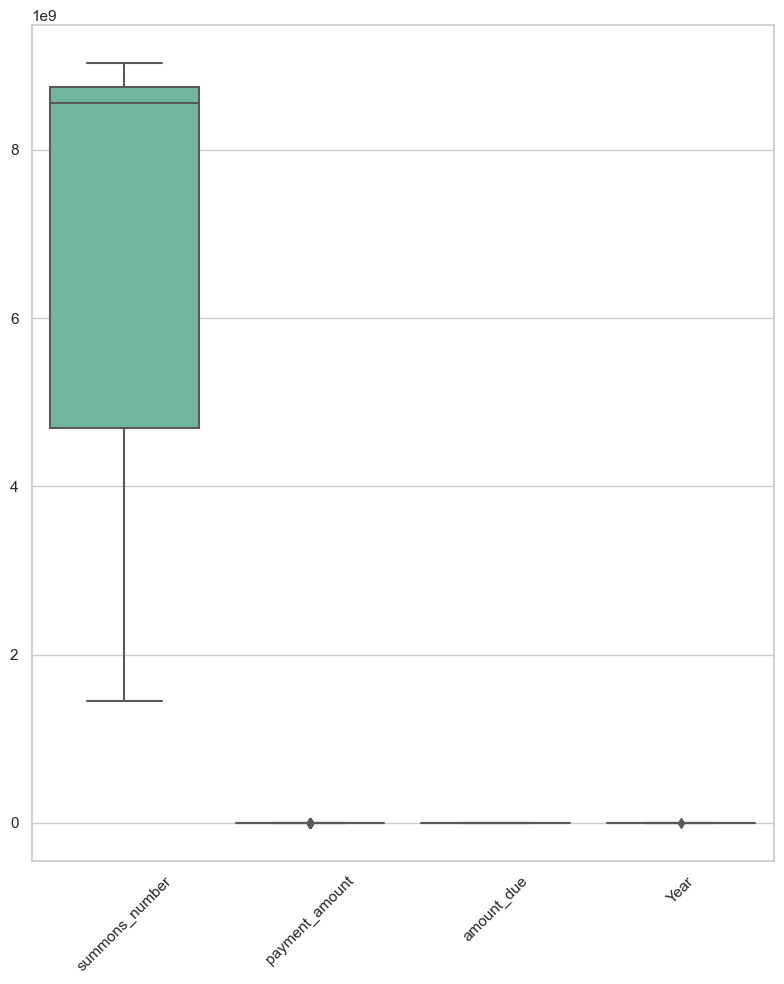

In [22]:
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
# Use seaborn to create box plots for all columns
sns.set(style="whitegrid")
ax = sns.boxplot(data=data, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

From above boxplots can say that there are no much outliers in the dataset across the attributes

In [23]:
def graphPlotFun(data, column_name, title):
        """This user defined function will plot the barcharts for the give input column and data set with the given title"""
        plt.figure(figsize=(25, 6))
        ax = data[column_name].value_counts().plot(kind="bar")
        ax.set_title(f'Matplotlib: {title}')
        plt.show()
        plt.figure(figsize=(25, 6))
        ax = sns.countplot(x=column_name, data=data)
        ax.set_title(f'Seaborn: {title}')
        plt.show()

This user defined function will plot the barcharts for the give input column and data set with the given title parameters.


### No of Violations by Year
Here I will be visuaize the data of number of violation happened by year

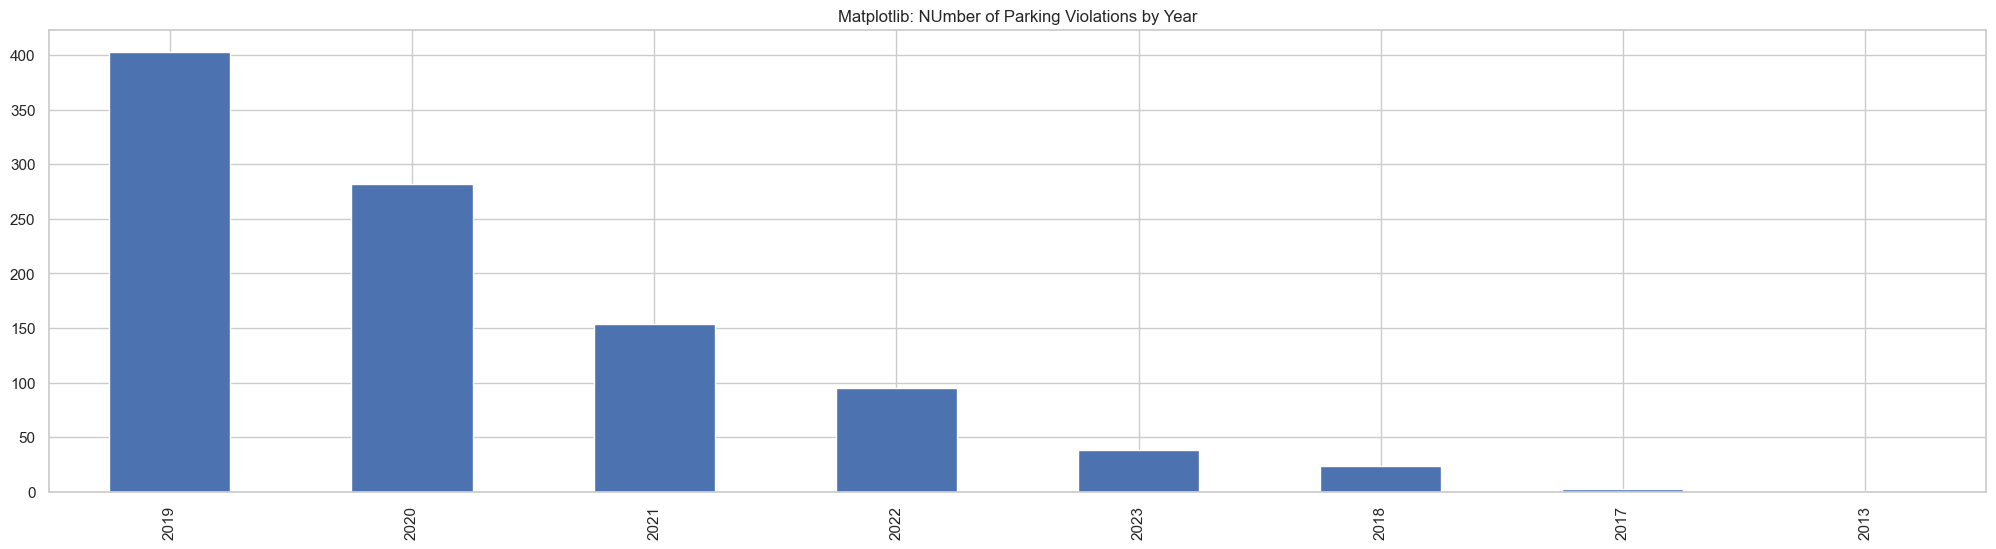

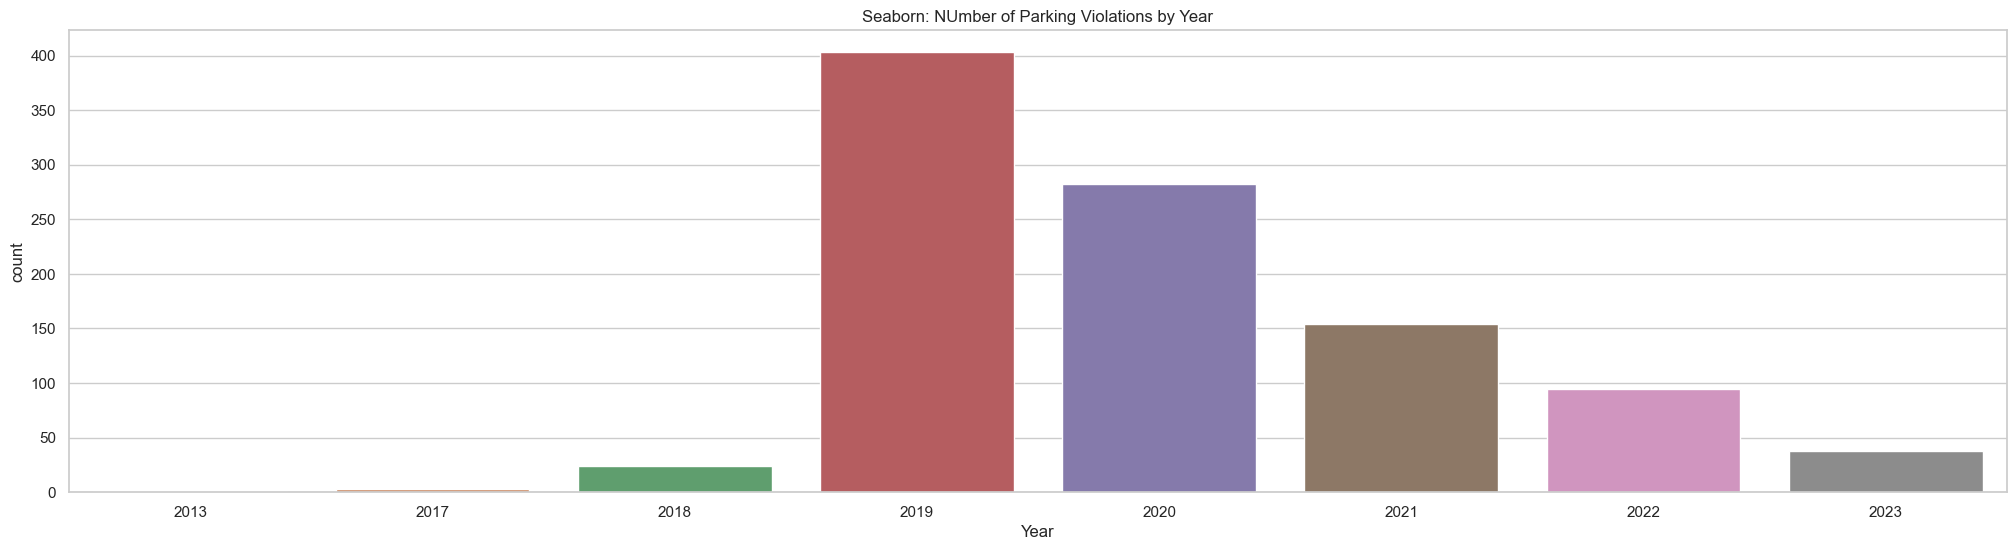

In [24]:
graphPlotFun(data,"Year","NUmber of Parking Violations by Year")

### Findings
According to the graphs it shows that year 2022 has highest number of parking violations followed by 2023 as per the available data.

### No of Parking Violations by Month

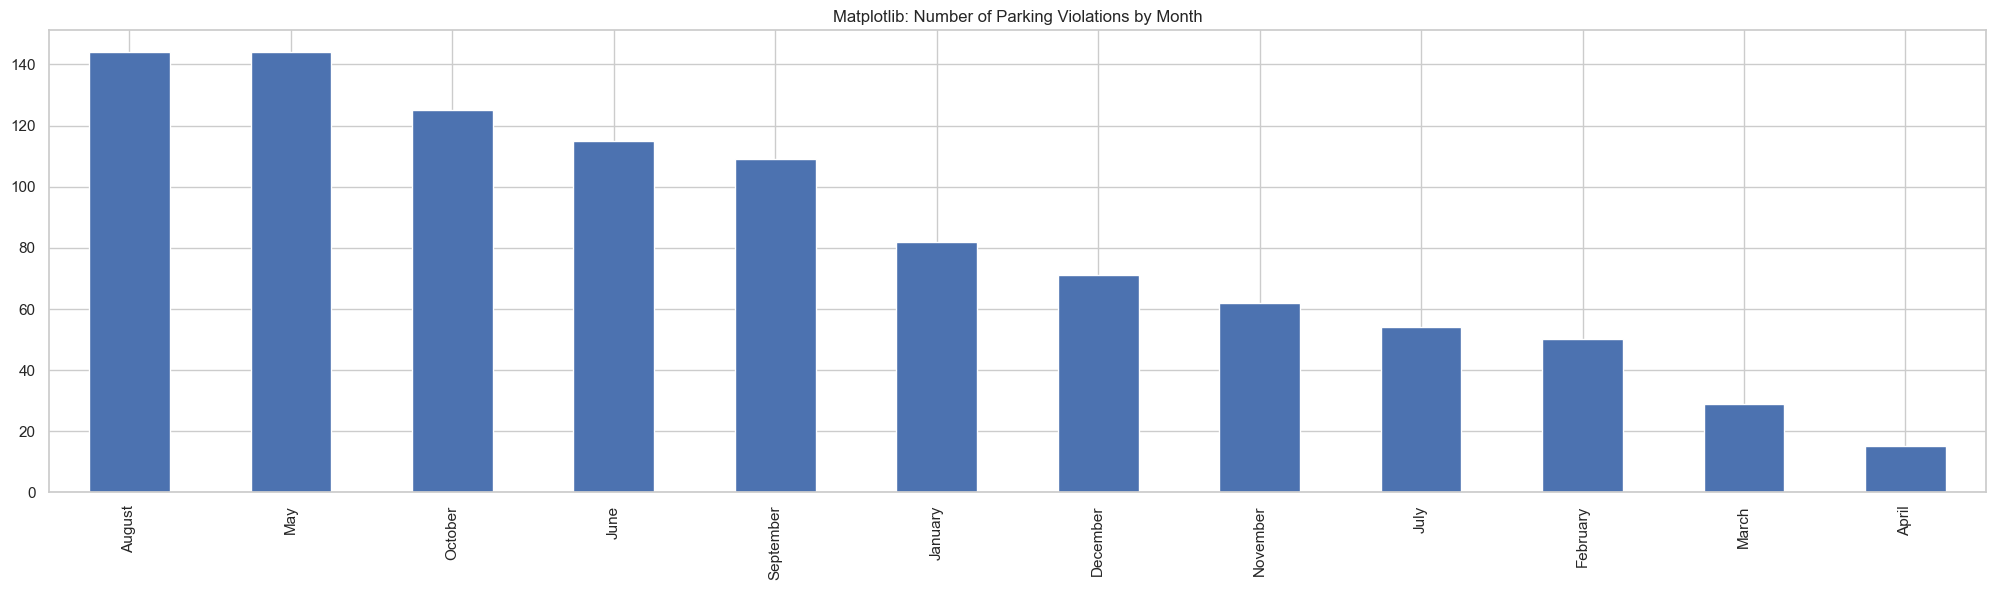

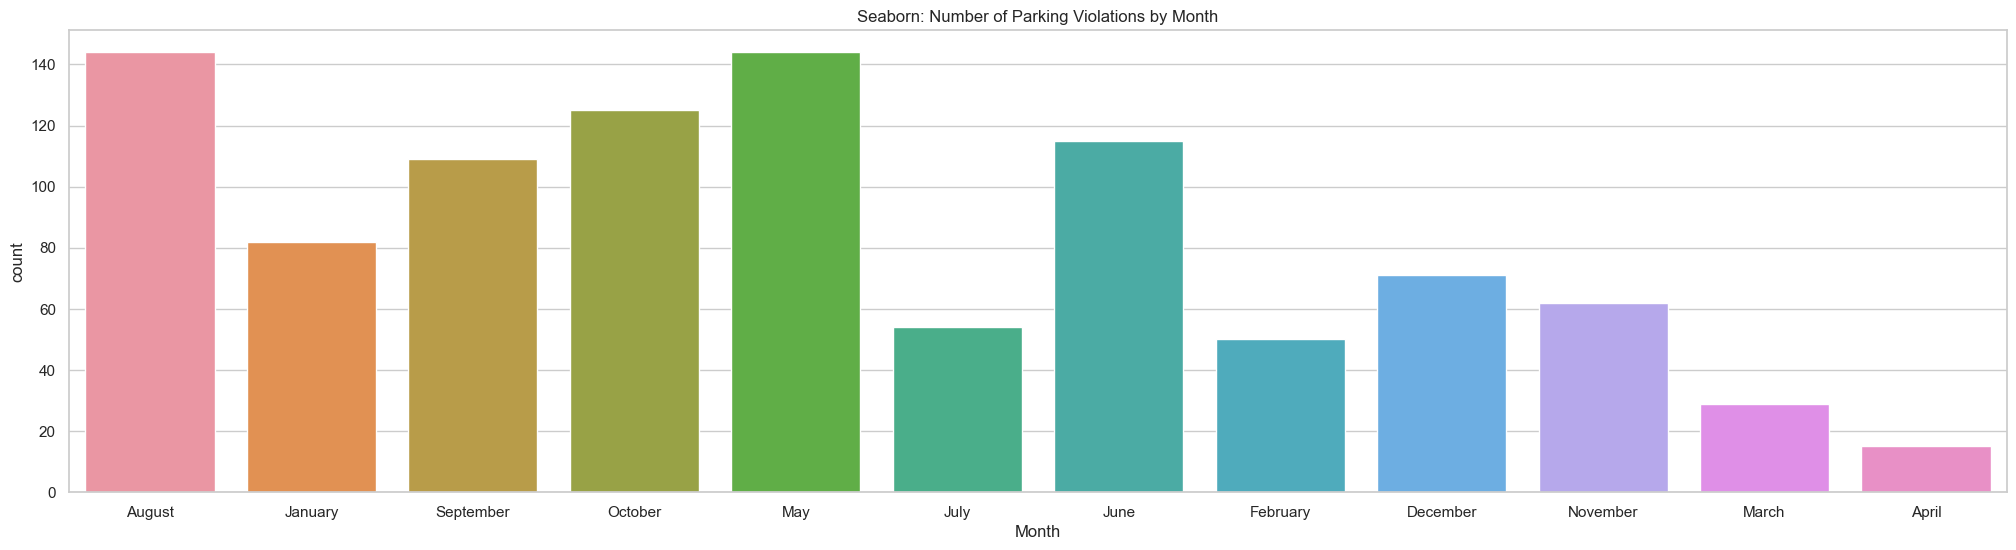

In [25]:
graphPlotFun(data,"Month","Number of Parking Violations by Month")

#### Findings:
It shows that  July and August months witnessed the large number of parking violations.

### No of parking violations by Day

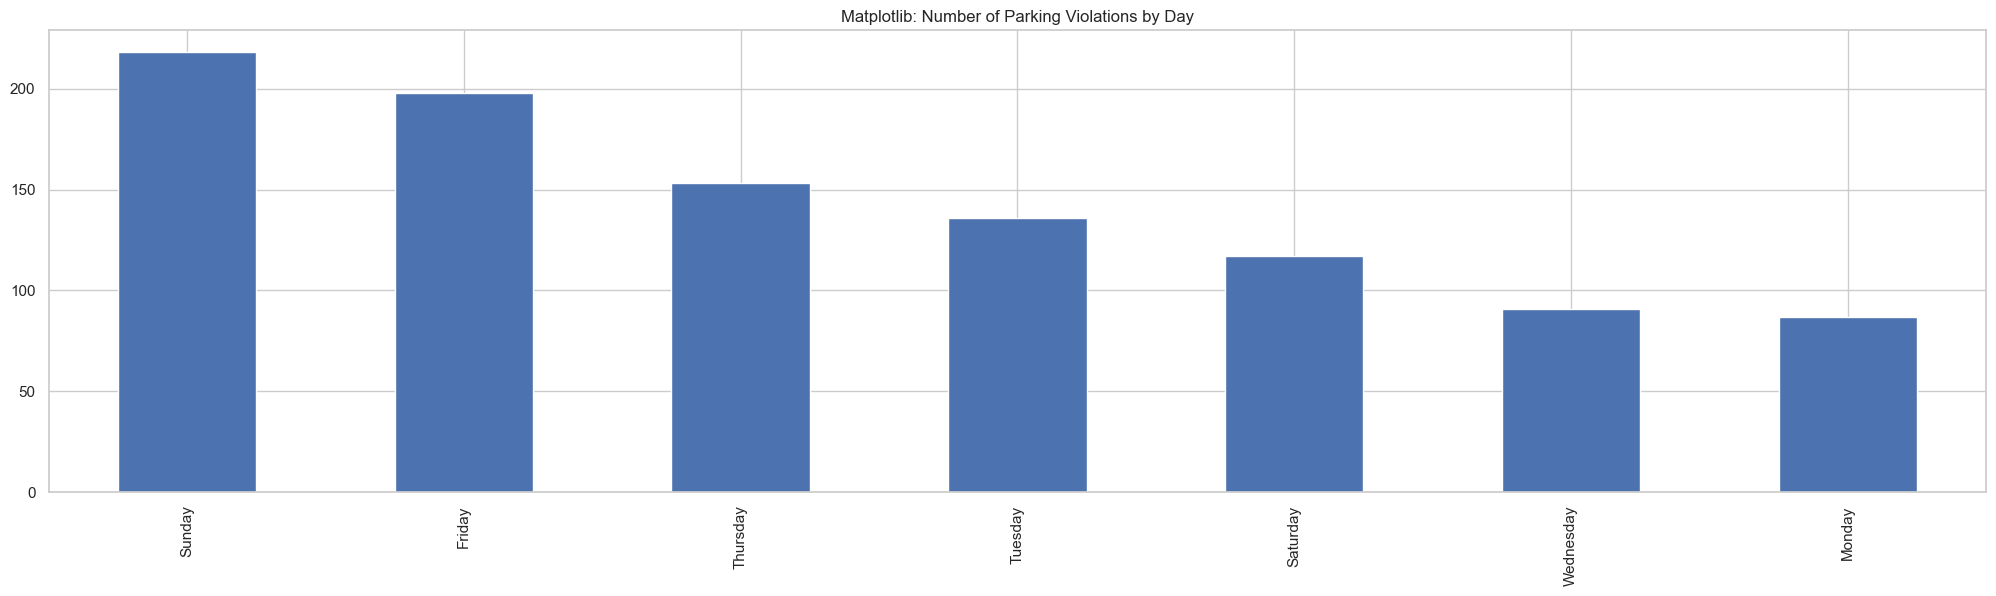

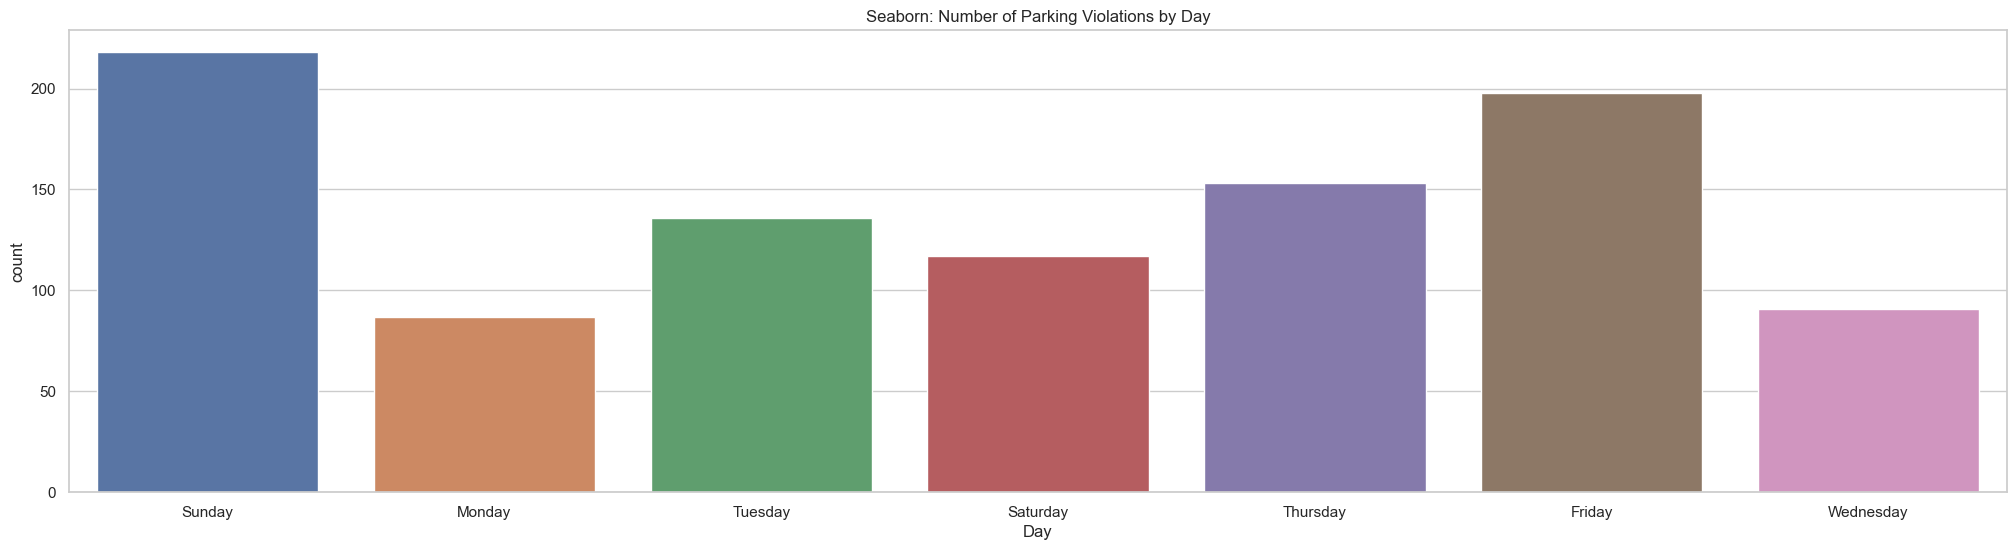

In [26]:
graphPlotFun(data,"Day","Number of Parking Violations by Day")

#### Findings:
It shows that Friday witnesses the large number of parking violations followed by Wednesday and saturday being the least.

### Parking violations by Time of the day

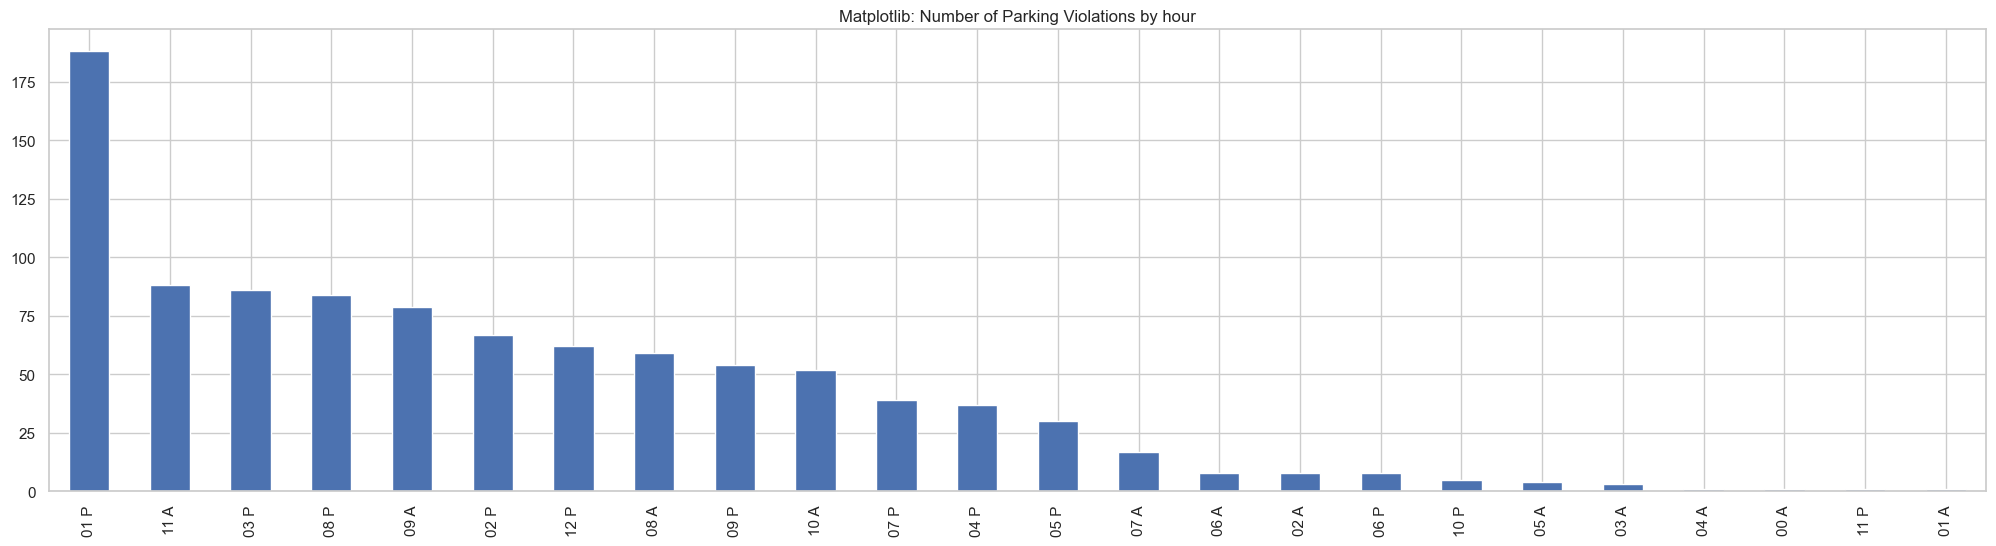

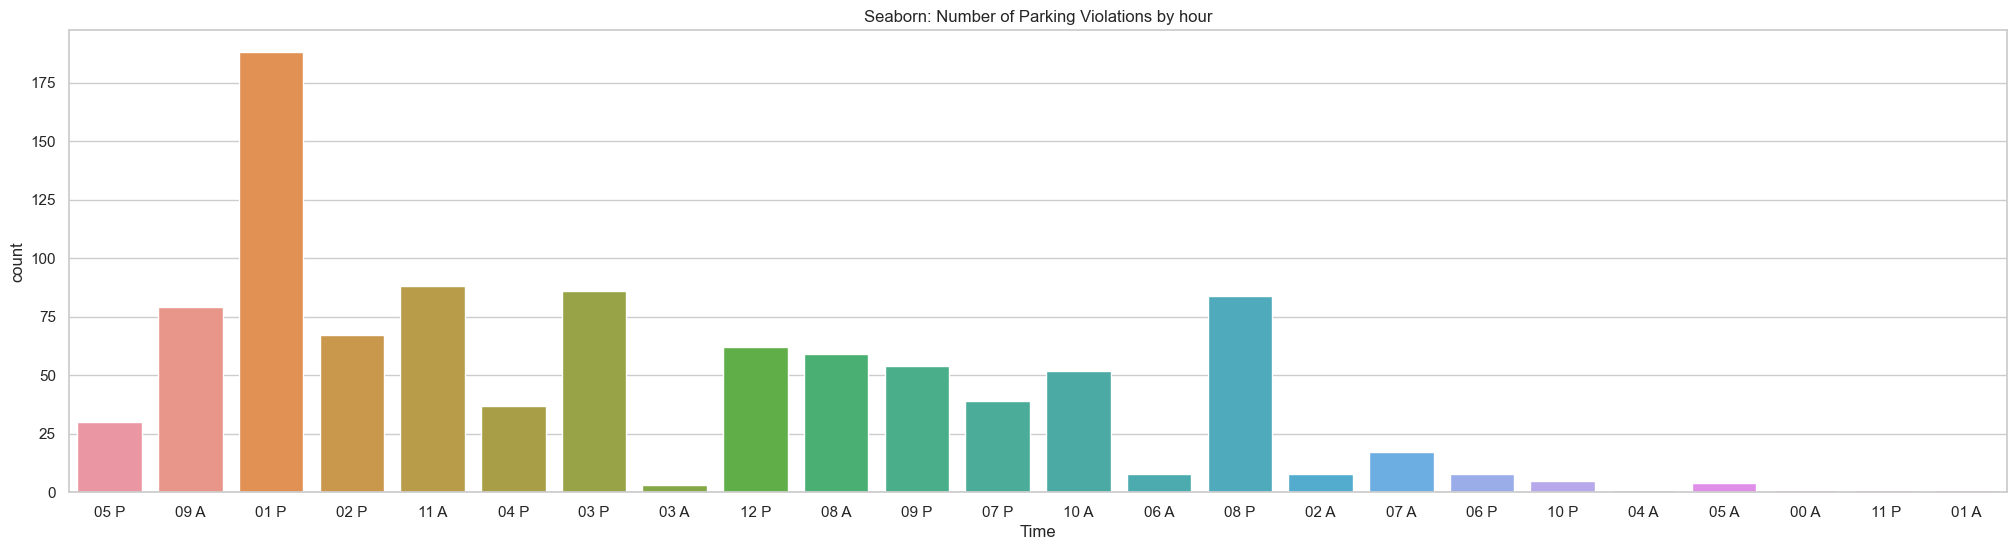

In [27]:
#as the time is in 12hour format and the column has AM and PM timing we merge both columns
data["Time"]=data["hour"]+" "+data["AM/PM"]
graphPlotFun(data,"Time","Number of Parking Violations by hour")

#### Findings

It shows that 1pm is the hour of the day which experiences more number of crashes in the day follwed by 2pm.

 7 AM to 8 AM and 1pm to 3pm witnessing the more number of parking violations in the day

### Parking Violations by Violation  type


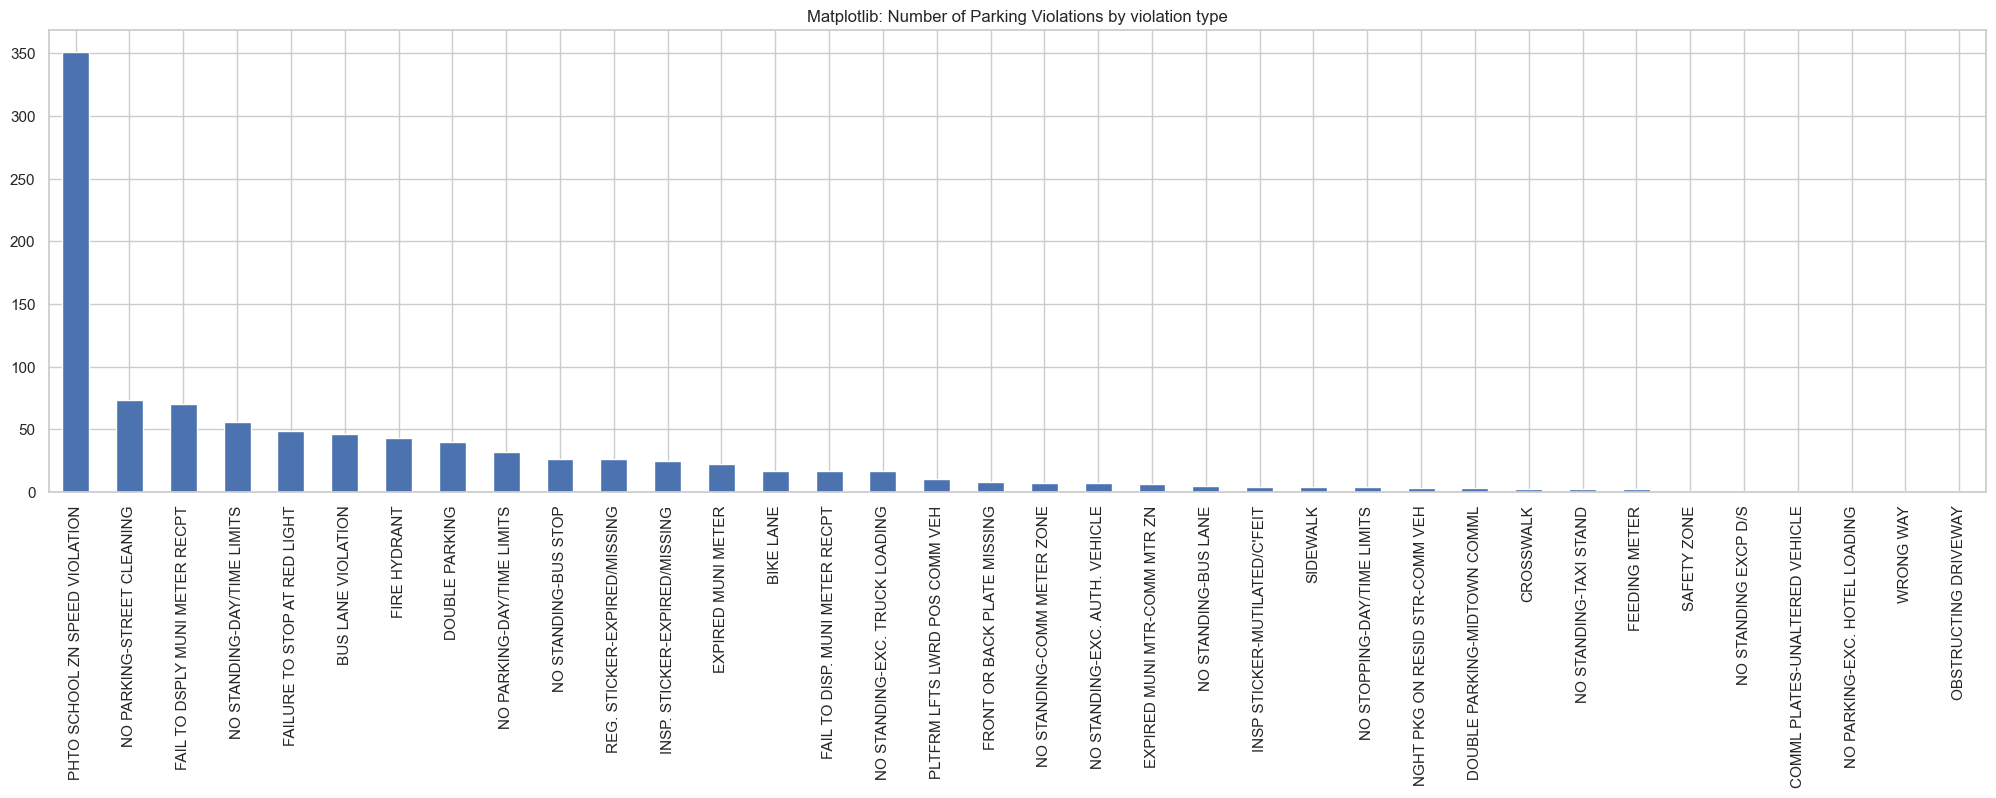

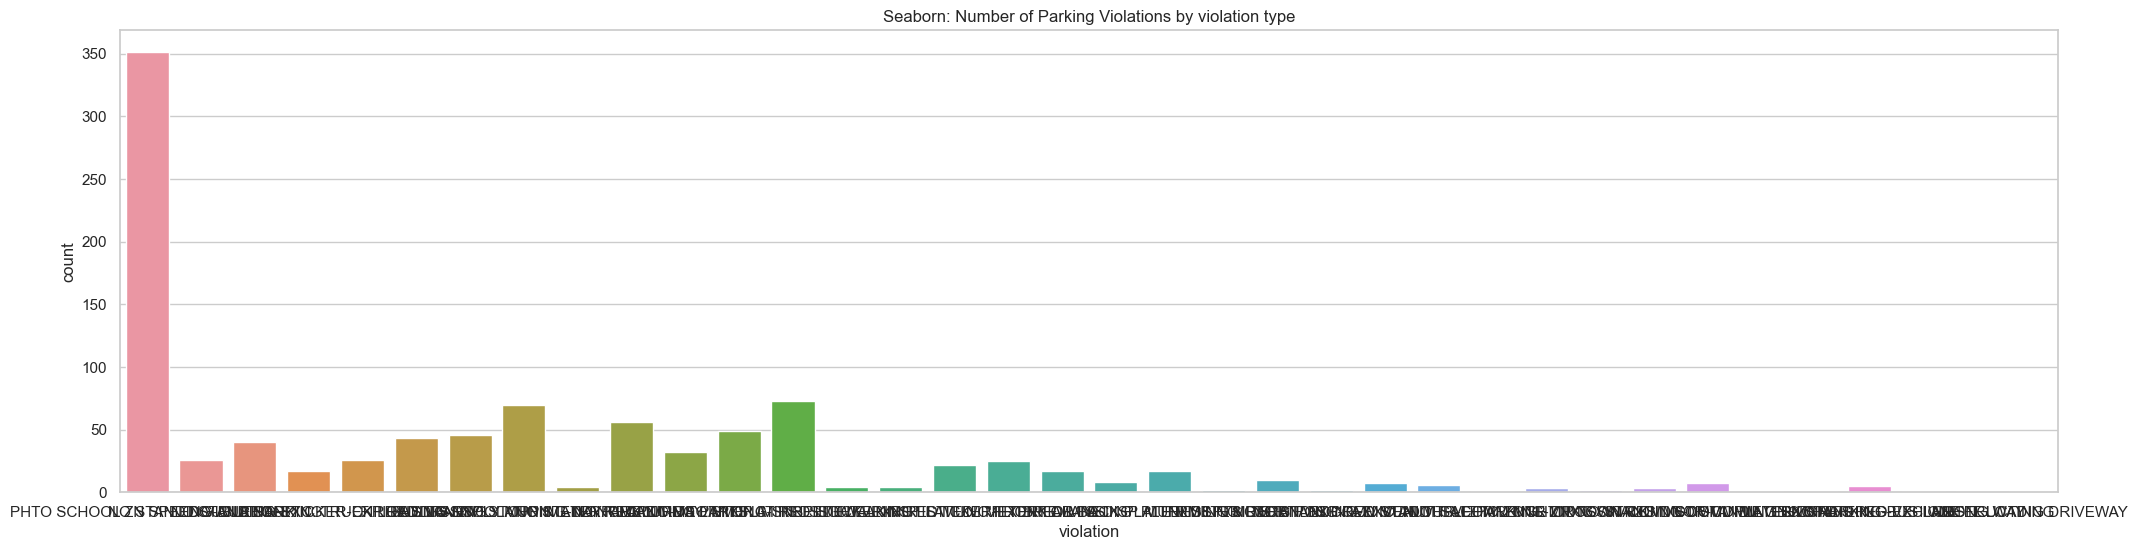

In [28]:
graphPlotFun(data,"violation","Number of Parking Violations by violation type")

#### Findings:

The three major reasons of the parking violations are as below:

1. School Zone speed violation
2. No Parking Street Cleaning
3. Fire Hydrant

## Violations by State

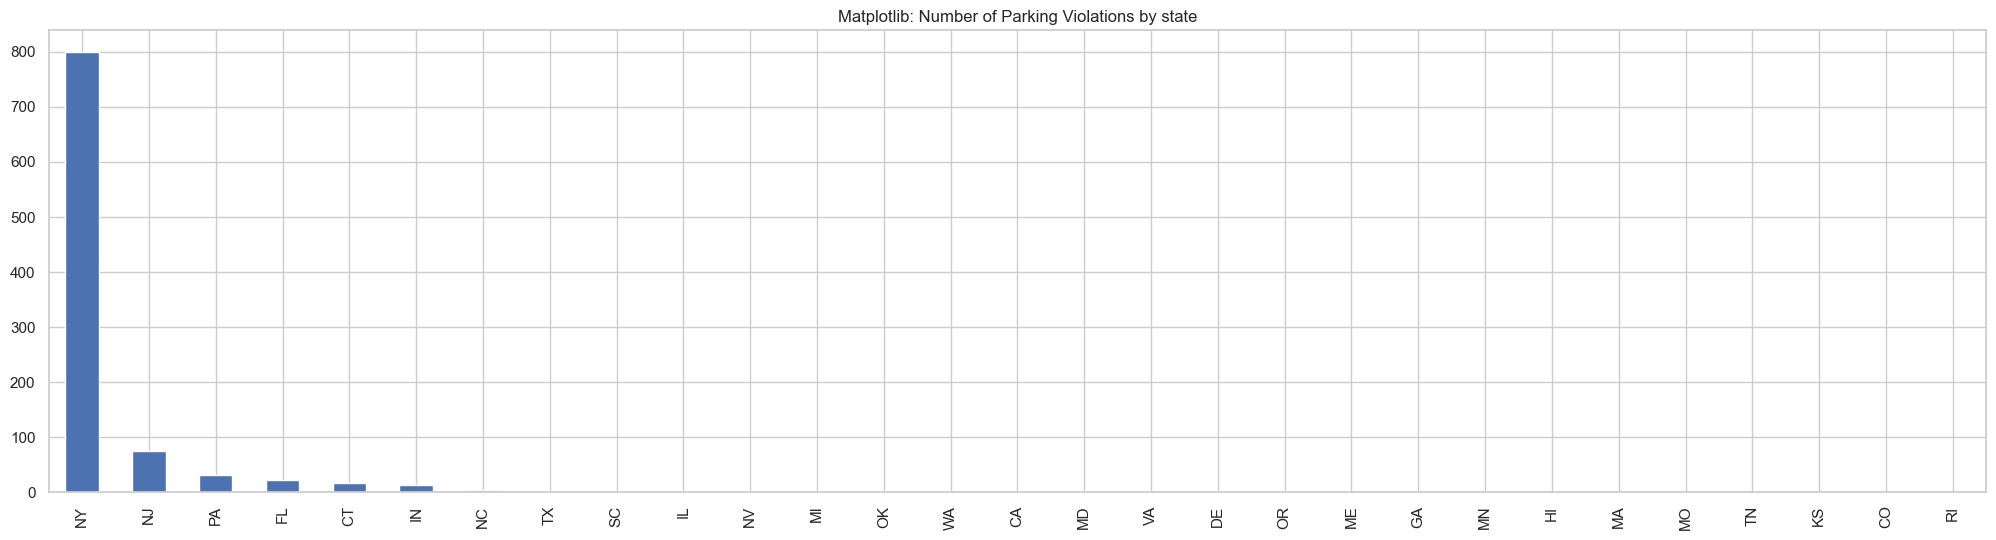

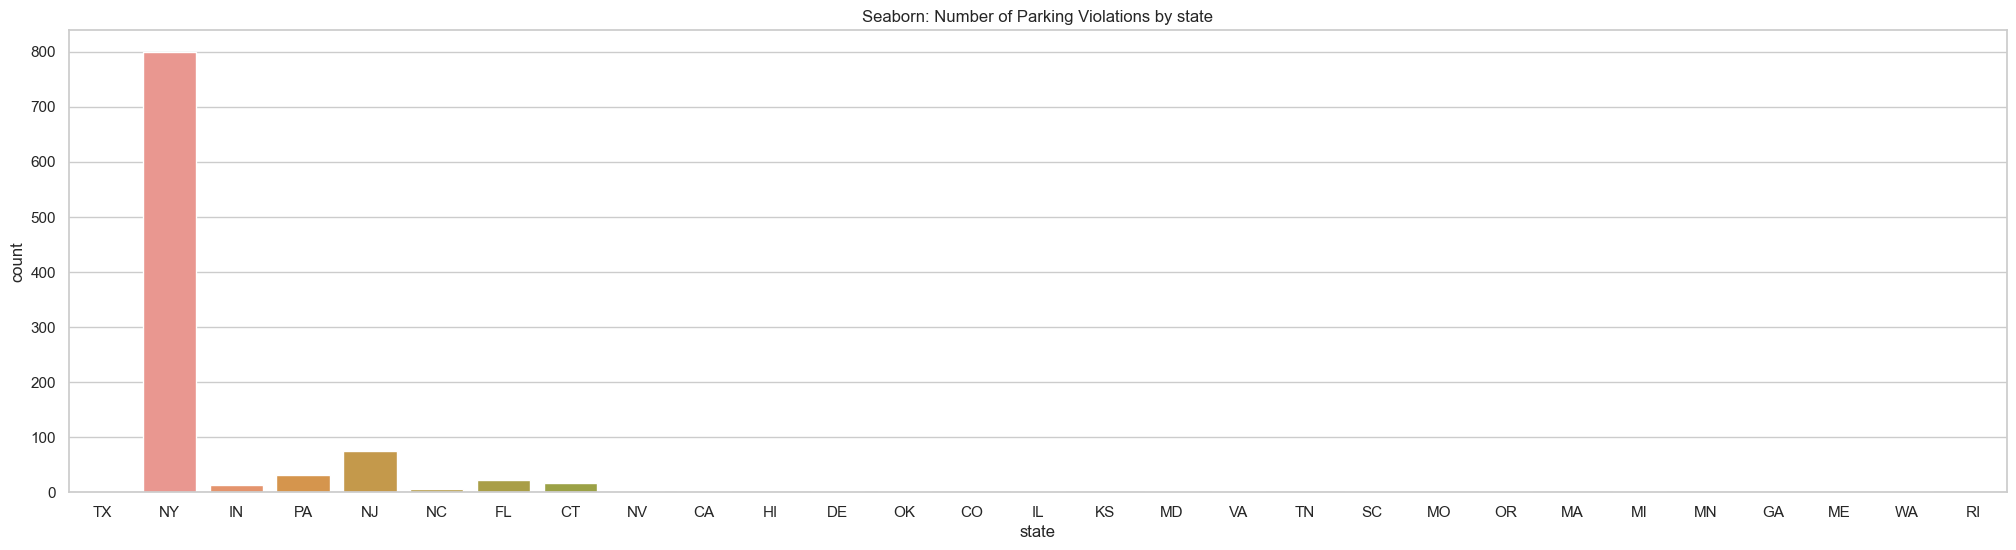

In [29]:
graphPlotFun(data,"state","Number of Parking Violations by state")

####Findings:

Interistly Newyork and New Jersey are the only states with highest number of parking violations occured as per the dataset Newyork being the first followed by the New Jersey

## Parking violations by issuing agnecy


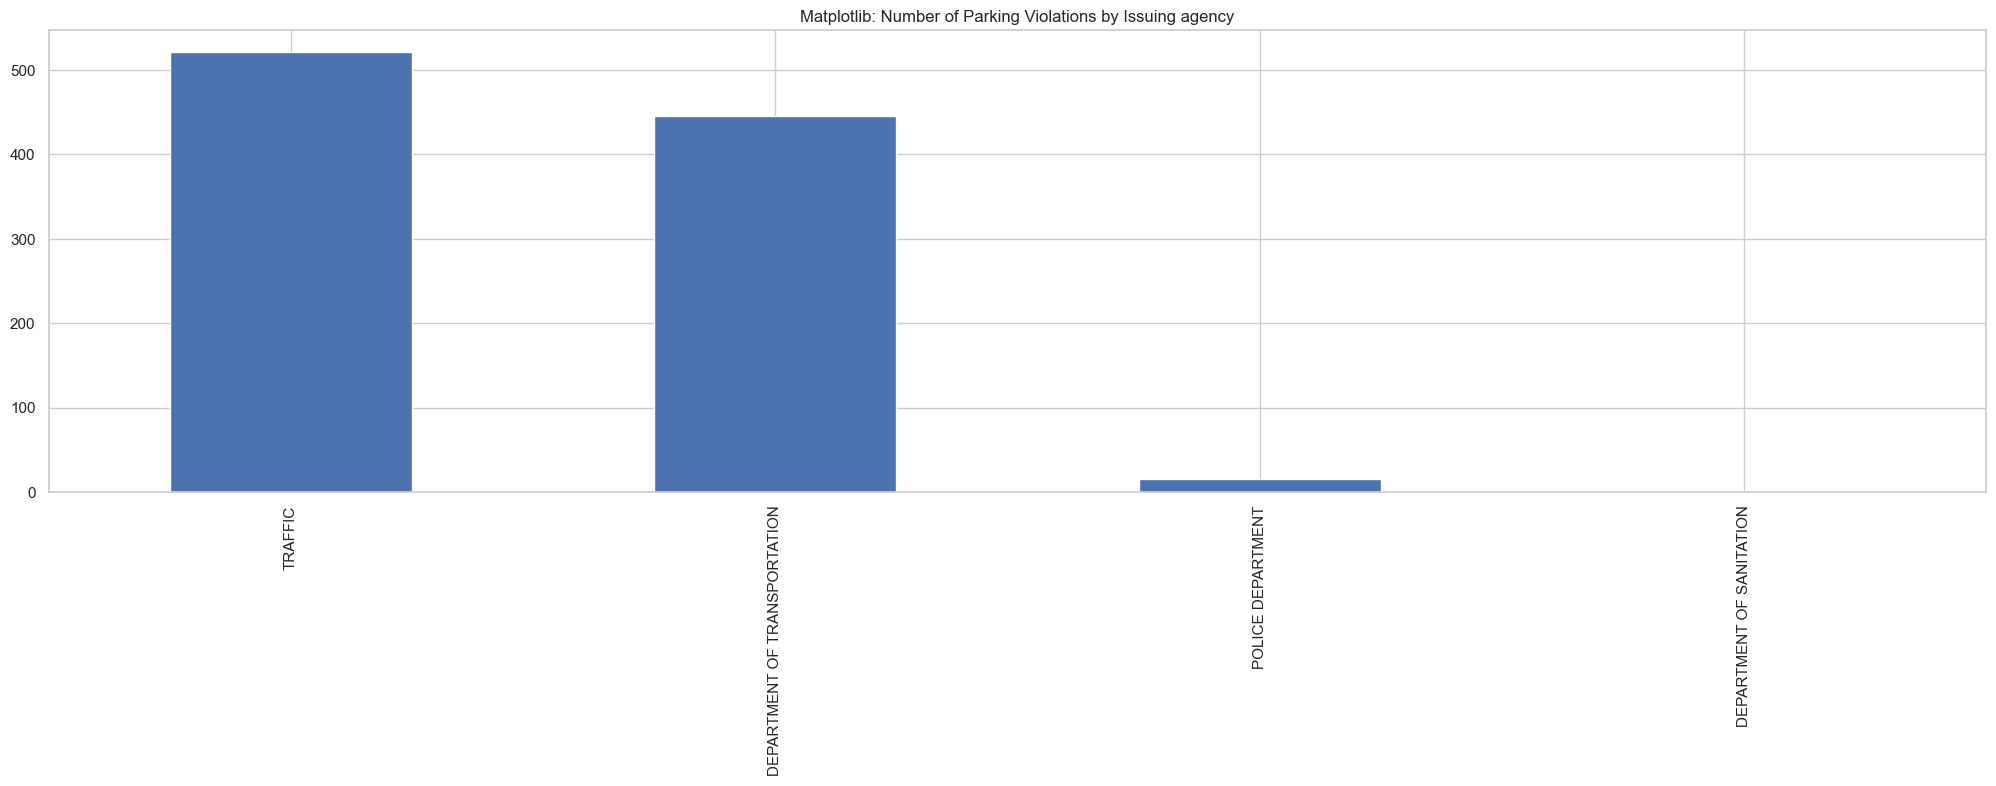

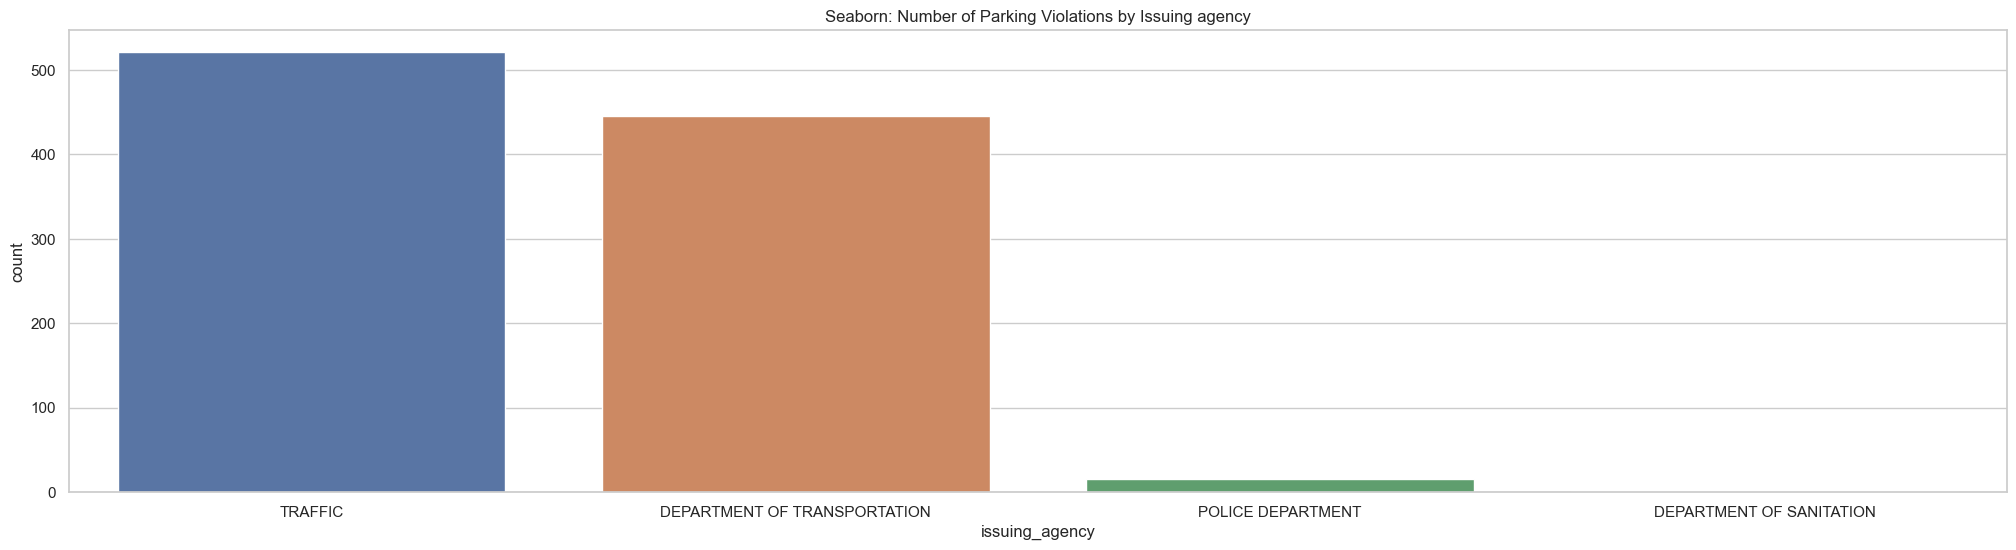

In [30]:
graphPlotFun(data,"issuing_agency","Number of Parking Violations by Issuing agency")

#### Findings:

It shows that the majority of the violations as been charged by the Traffic department followed by the transportation department.

## Parking violations by license type

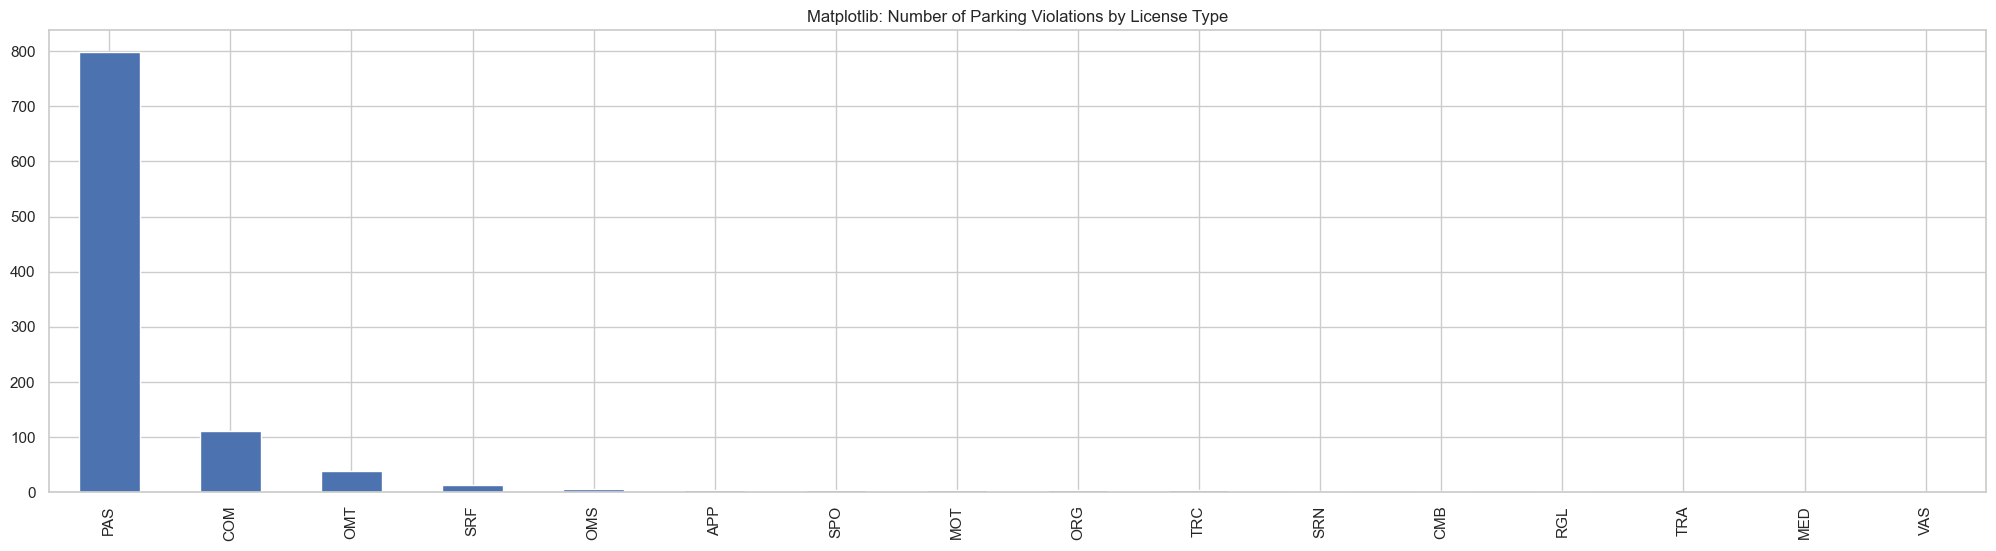

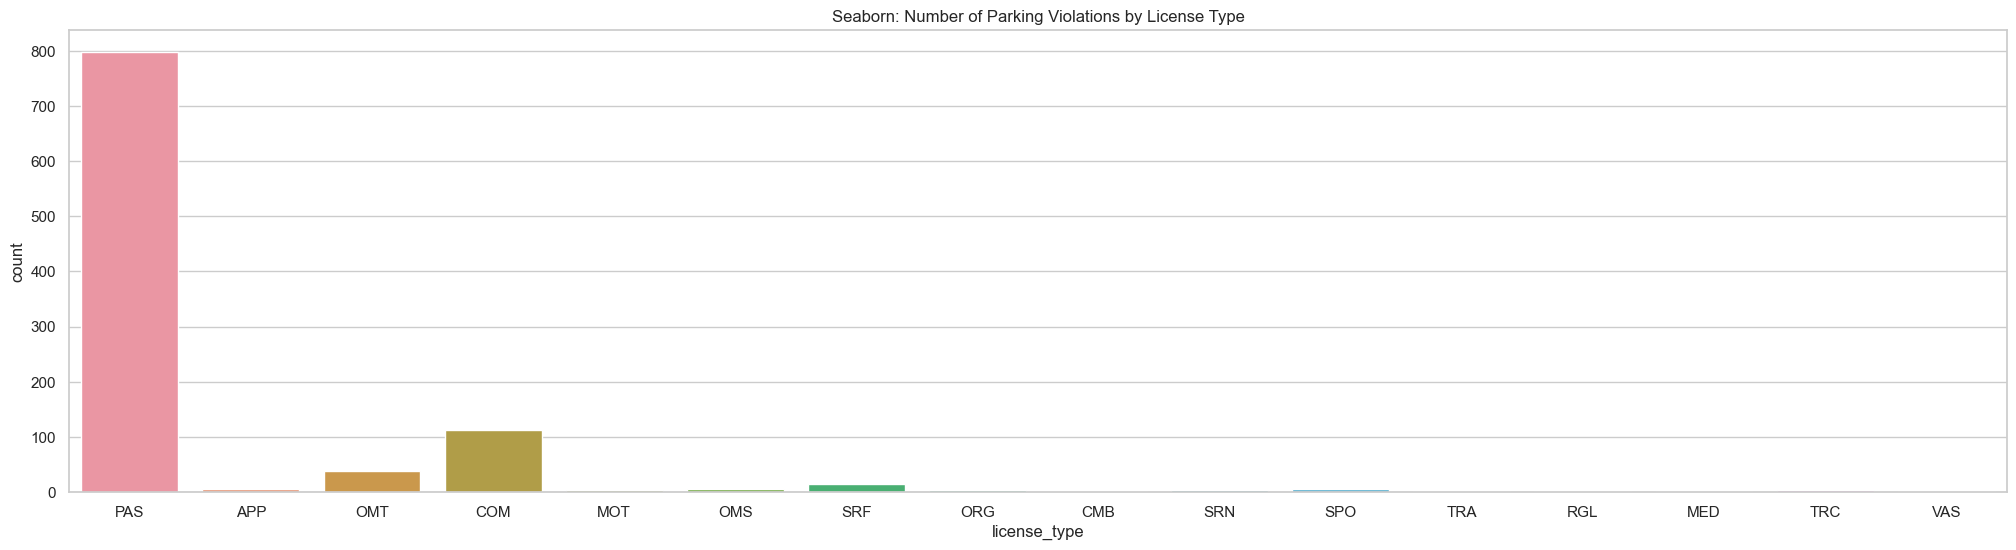

In [31]:
graphPlotFun(data,"license_type","Number of Parking Violations by License Type")

####Findings:

PAS license type is experiencing the majority of the violations and its very huge compared to others types of license.

Note : "PAS" typically stands for "Passenger." It indicates that the driver's license type associated with the violation is for a passenger vehicle. This category often includes standard personal vehicles used for transportation, as opposed to commercial or special-use vehicles.

"COM" indicates the commerical license type

##Parking Violations by County

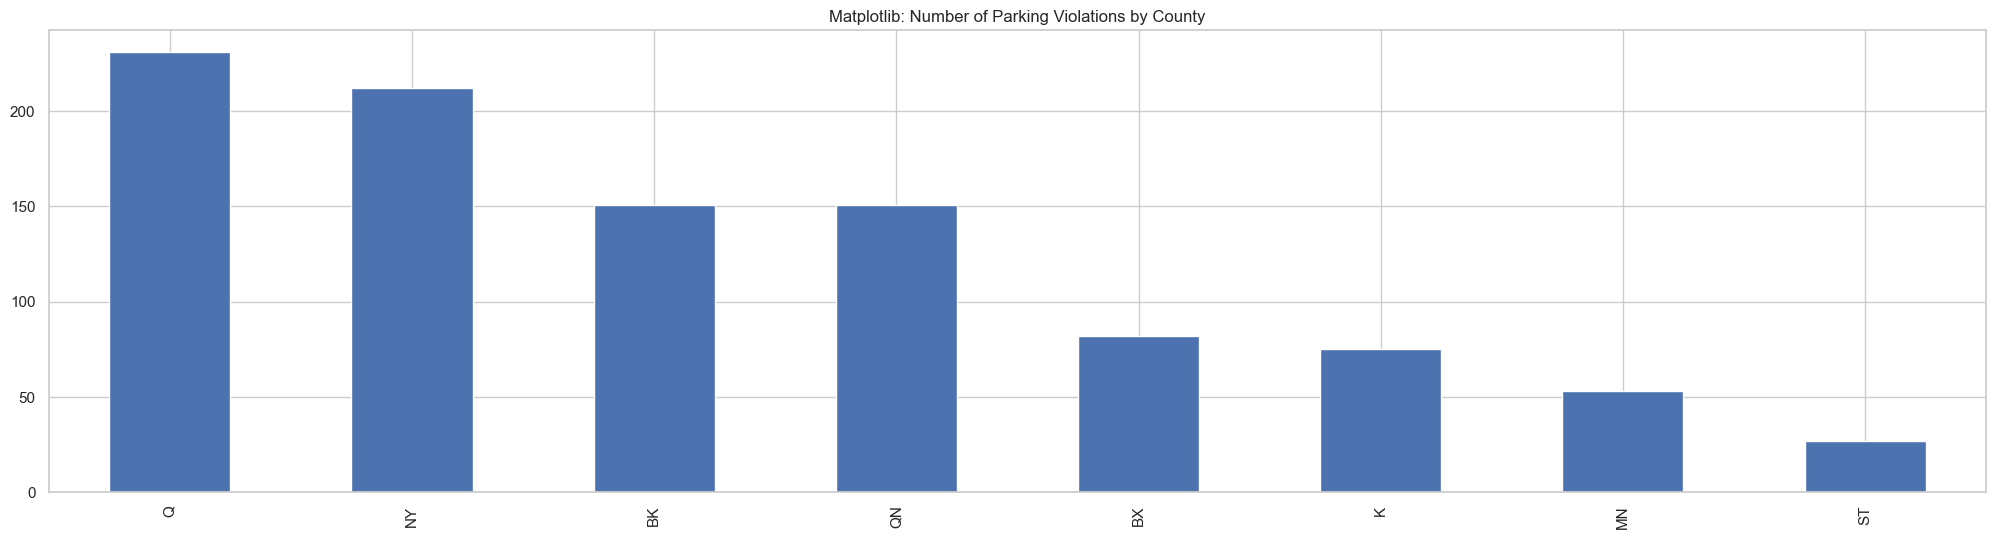

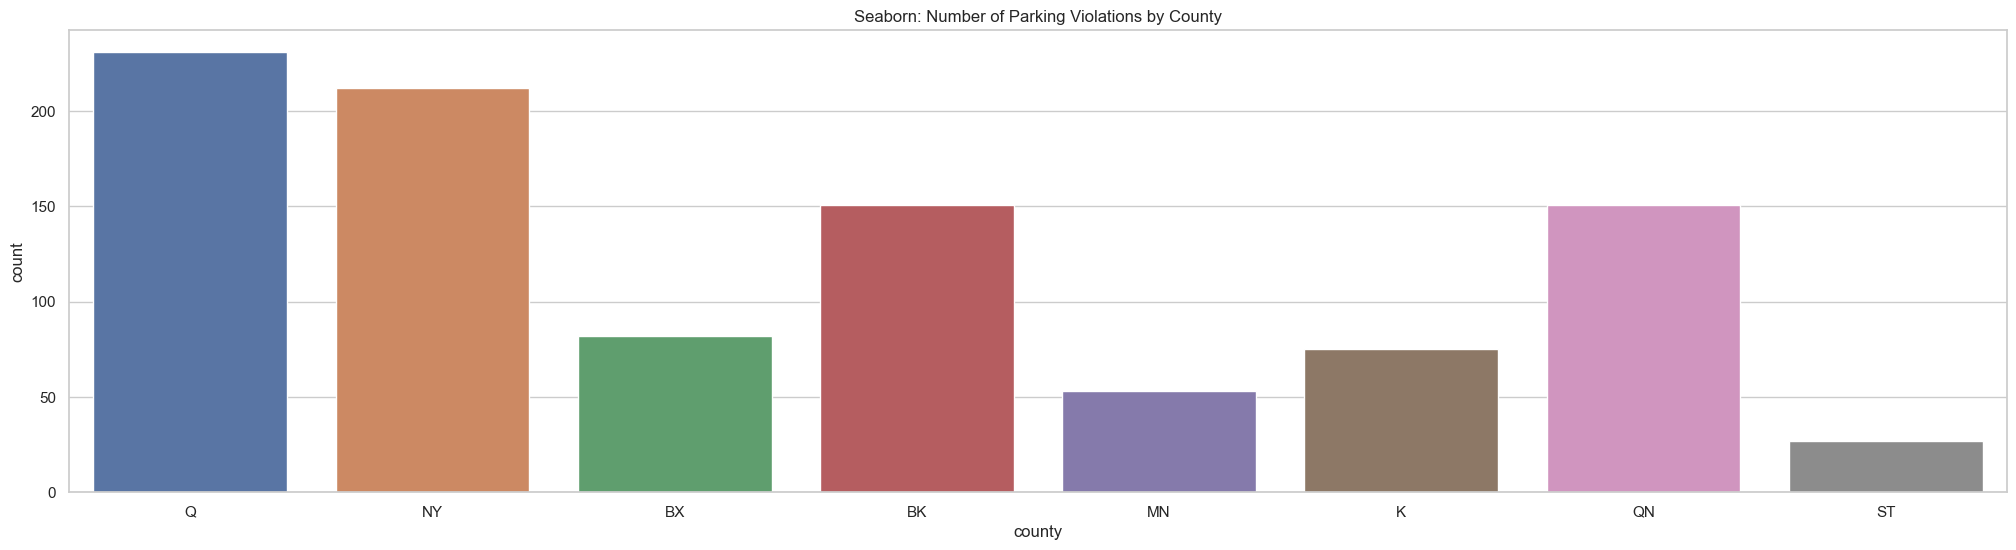

In [32]:
graphPlotFun(data,"county","Number of Parking Violations by County")

#### Findings:
Newyork County has highest number of the parking violations follwed by county "Bronx".

#4.Inference
With the Exploratory Data Analysis phase concluded, we will now proceed with the analysis necessary to address our research questions.


###1.Which states or regions have the highest number of parking and camera violations?


NY    799
NJ     75
PA     31
FL     23
CT     16
IN     14
NC      5
TX      3
SC      3
IL      3
NV      2
MI      2
OK      2
WA      2
CA      2
MD      2
VA      2
DE      2
OR      2
ME      1
GA      1
MN      1
HI      1
MA      1
MO      1
TN      1
KS      1
CO      1
RI      1
Name: state, dtype: int64


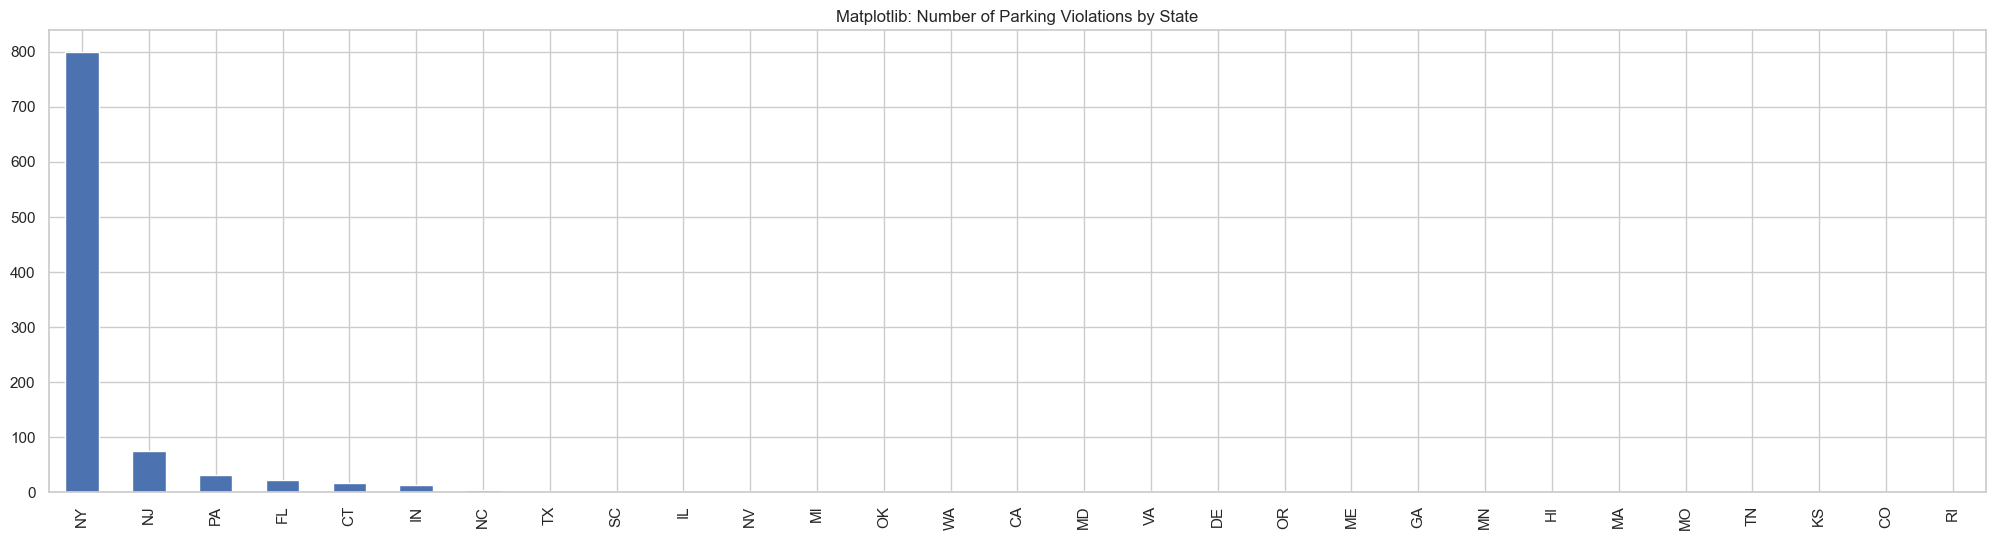

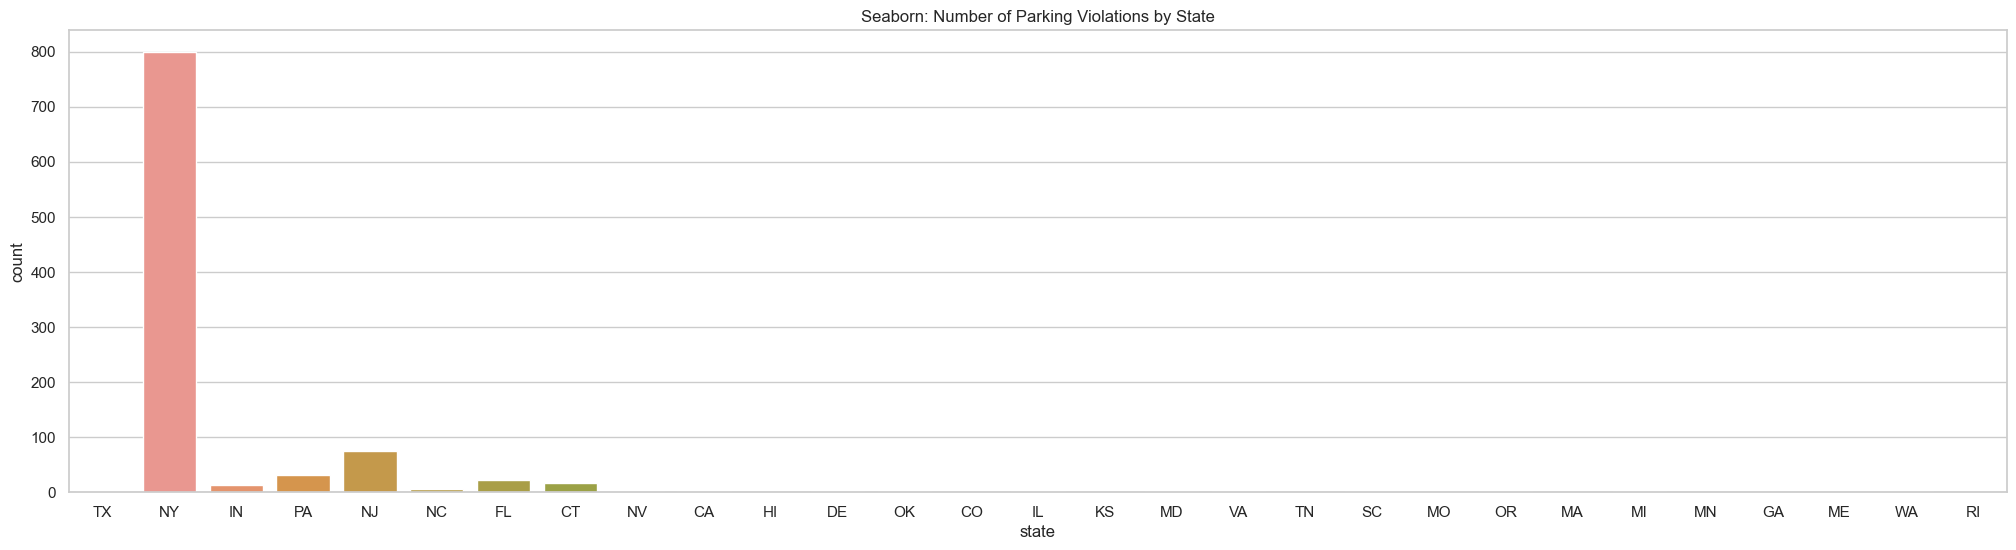

In [33]:
#state
print(data['state'].value_counts())
graphPlotFun(data,"state","Number of Parking Violations by State")

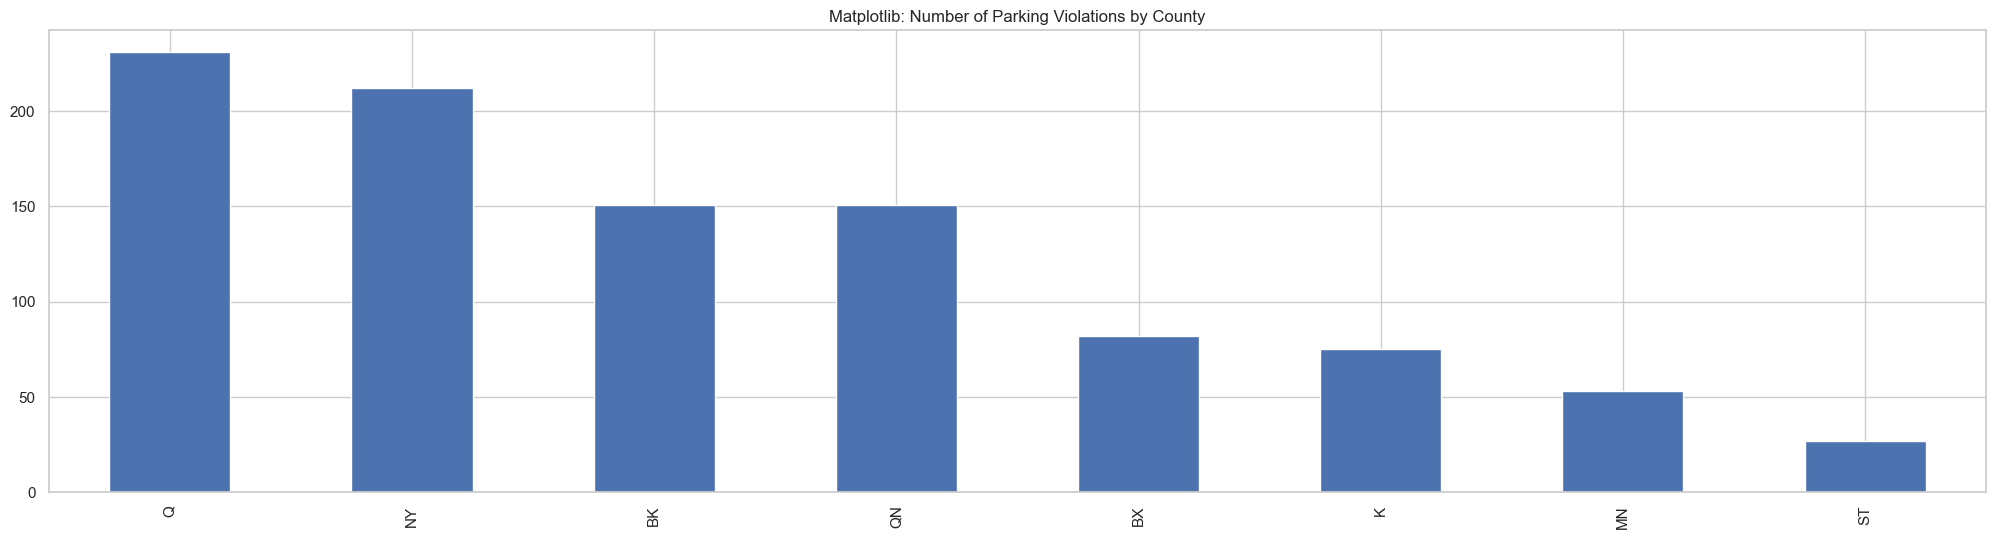

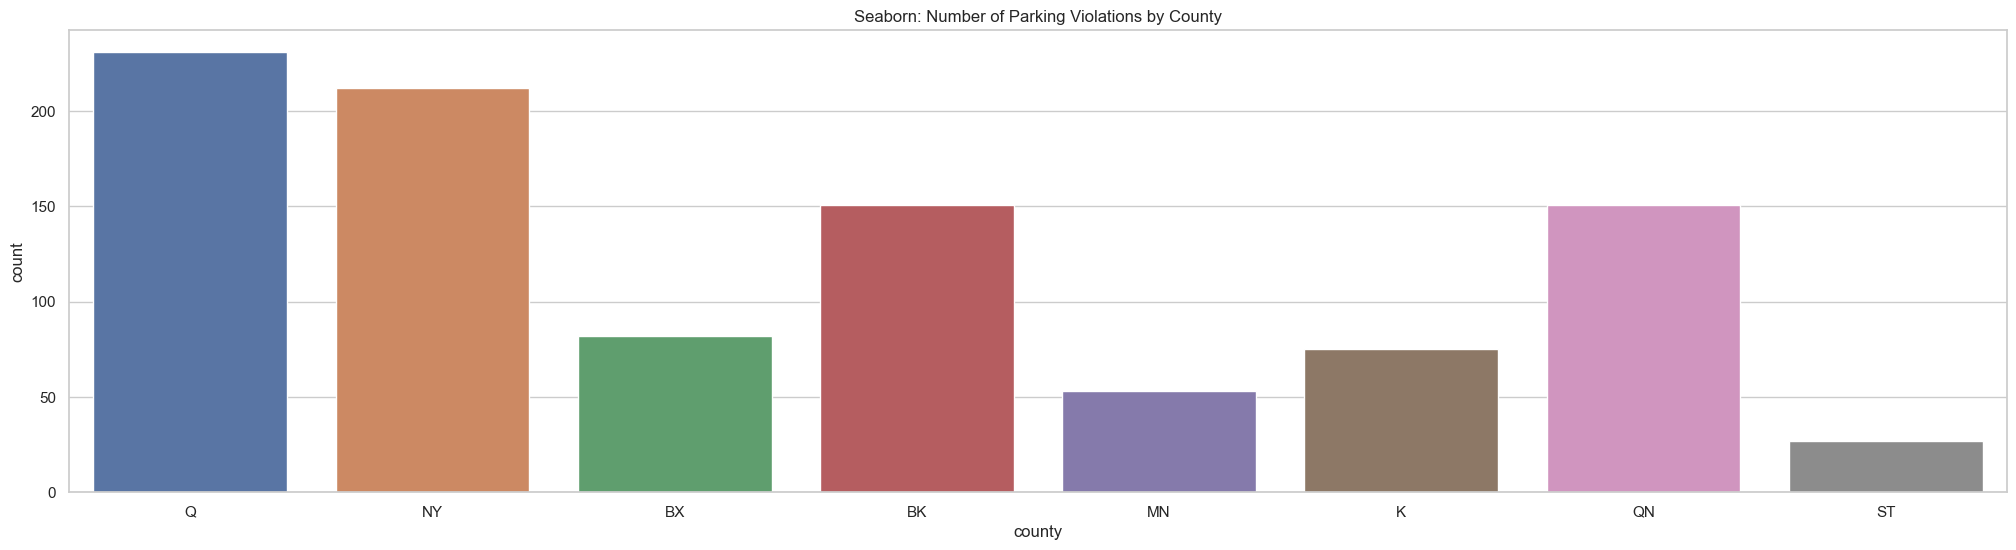

In [34]:
#county
data['county'].value_counts()
graphPlotFun(data,"county","Number of Parking Violations by County")

So State New York stood at first with large number of parking violations followed by New Jersey. In terms of county Brooklyn stands at first followed by Queens.

##2.Are there significant differences in violation frequencies among different issuing agencies?



TRAFFIC                         521
DEPARTMENT OF TRANSPORTATION    445
POLICE DEPARTMENT                16
DEPARTMENT OF SANITATION          1
Name: issuing_agency, dtype: int64


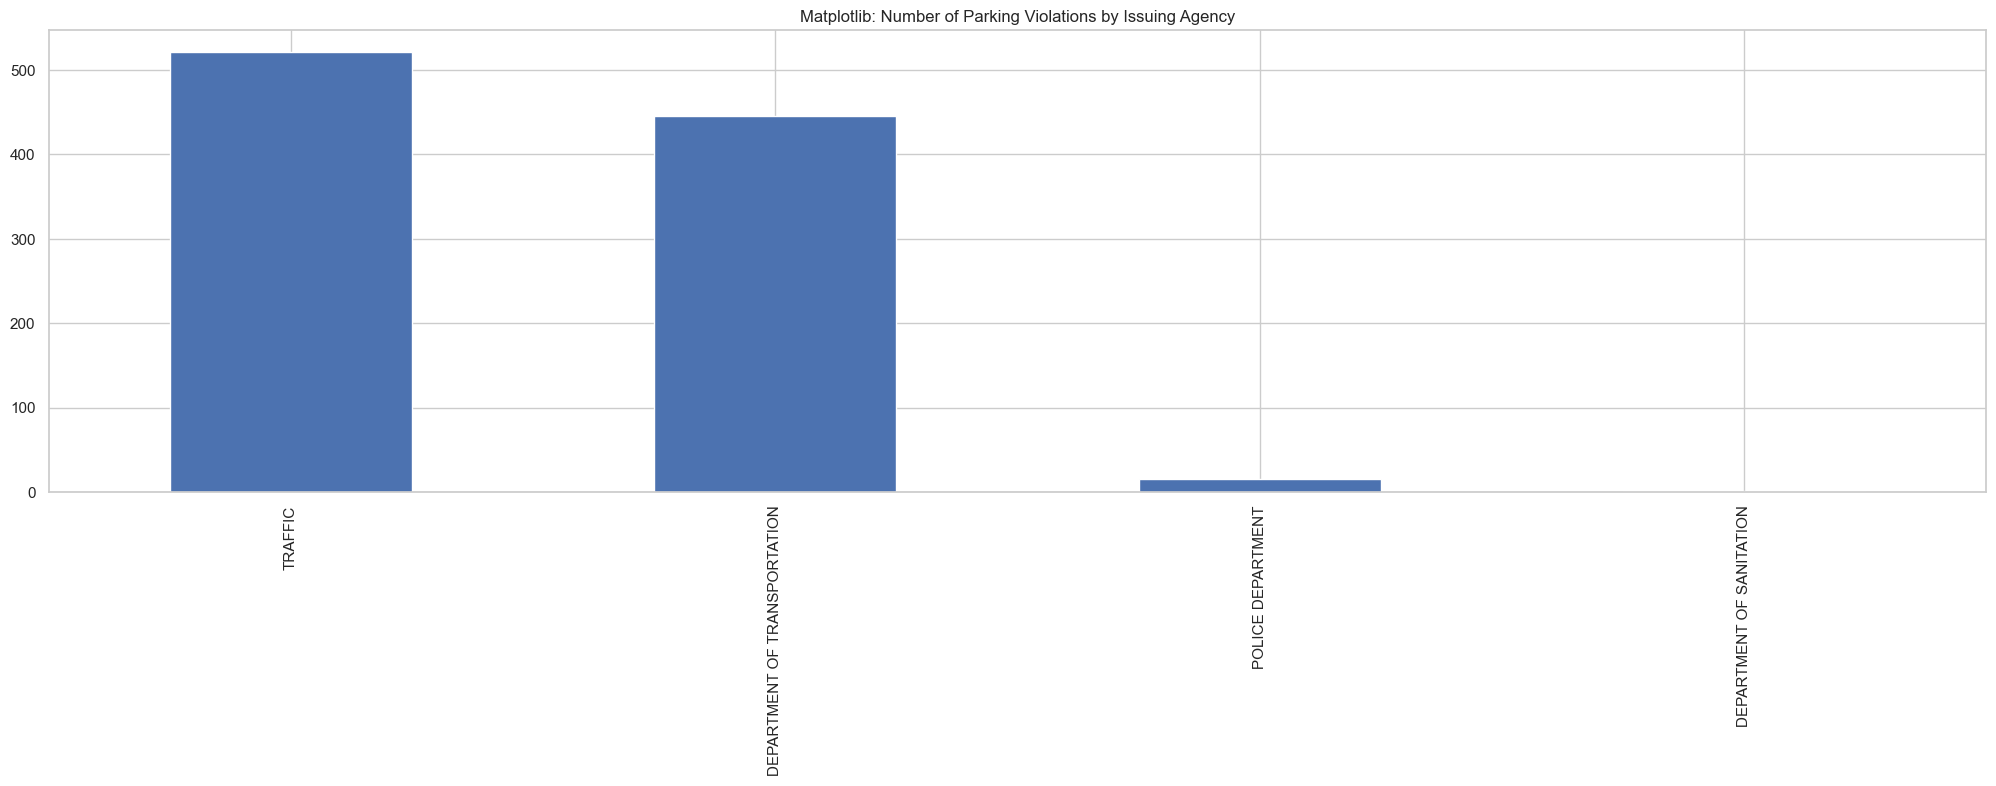

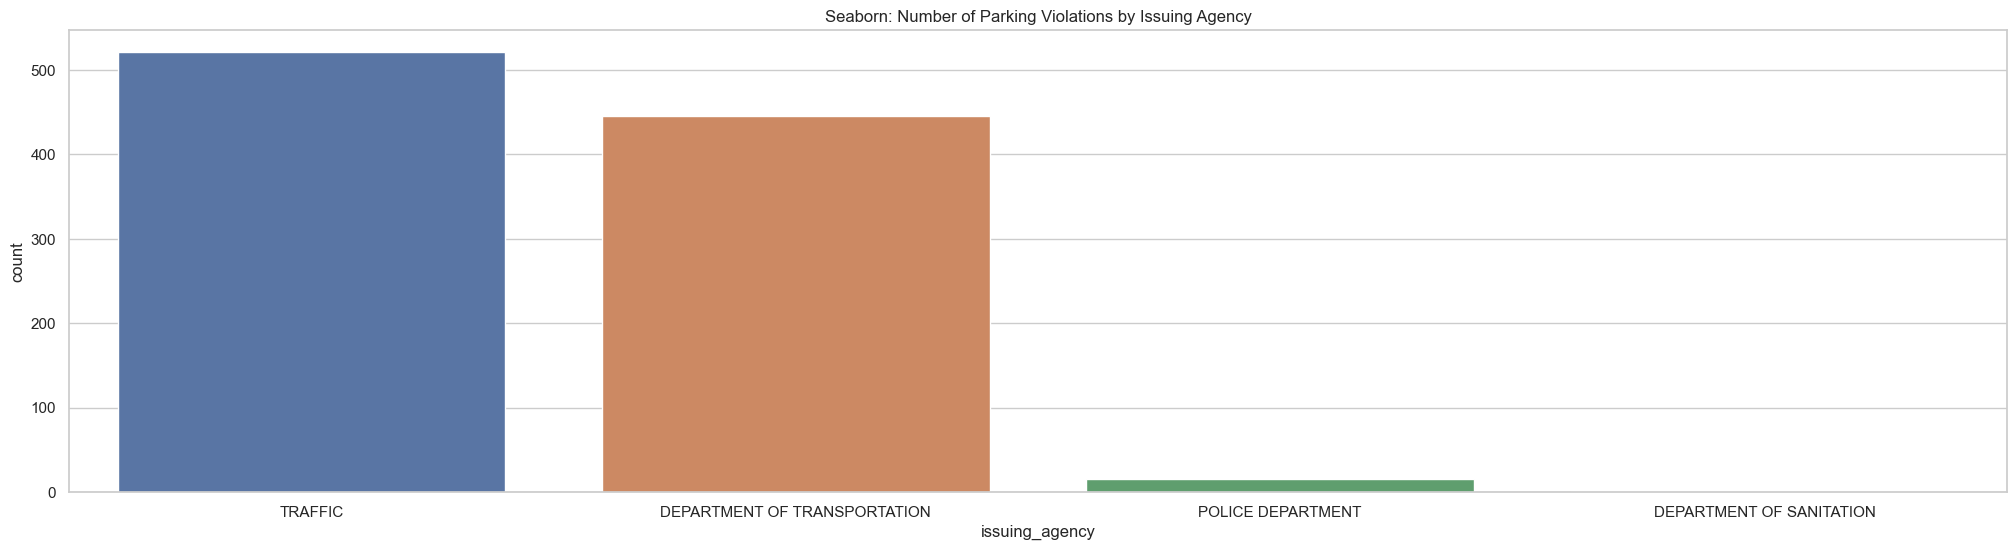

In [35]:
print(data['issuing_agency'].value_counts())
graphPlotFun(data,"issuing_agency","Number of Parking Violations by Issuing Agency")

Yes Traffic department is issuing more violation tickets followed by Department of Transportation

##3.Are there any noticeable trends in violation occurrences over time?



01 P    188
11 A     88
03 P     86
08 P     84
09 A     79
02 P     67
12 P     62
08 A     59
09 P     54
10 A     52
07 P     39
04 P     37
05 P     30
07 A     17
06 A      8
02 A      8
06 P      8
10 P      5
05 A      4
03 A      3
04 A      1
00 A      1
11 P      1
01 A      1
Name: Time, dtype: int64


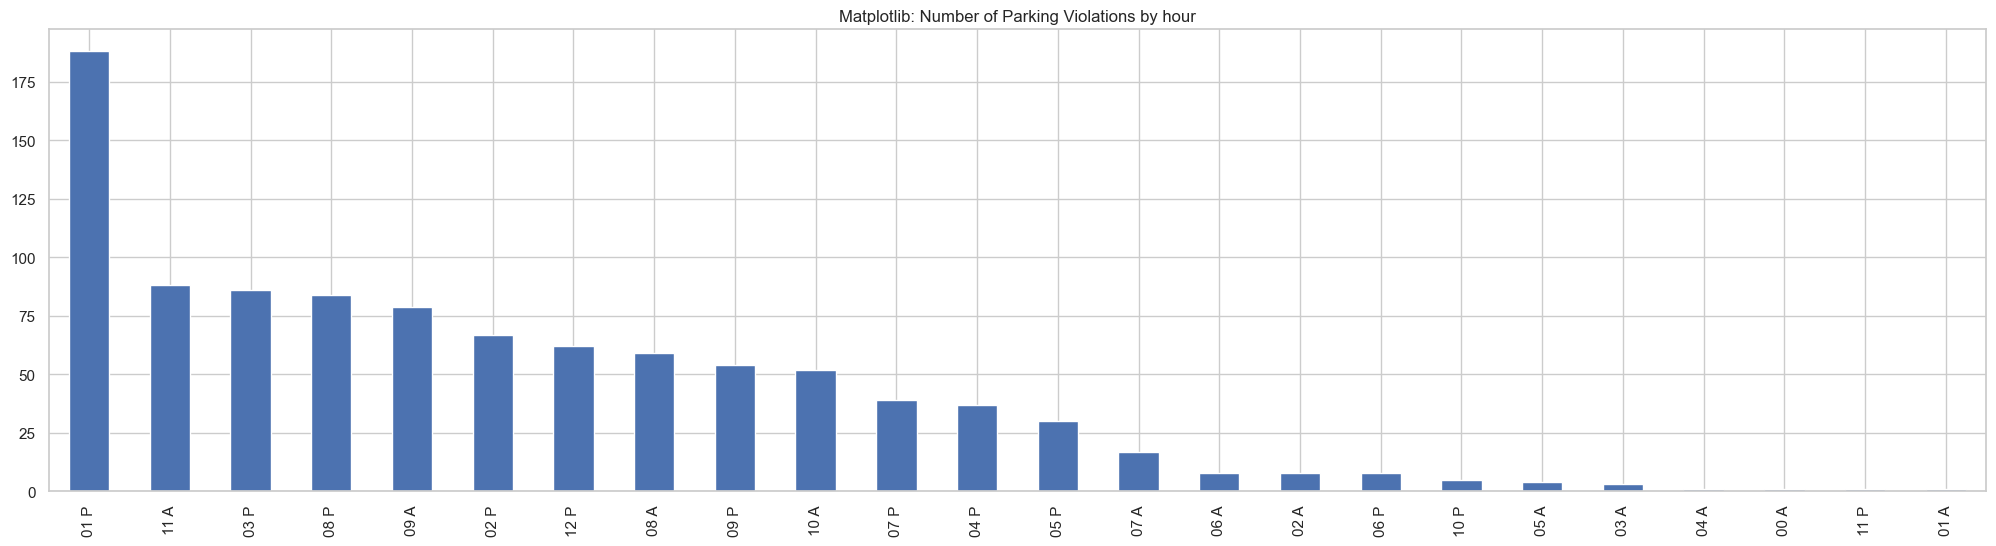

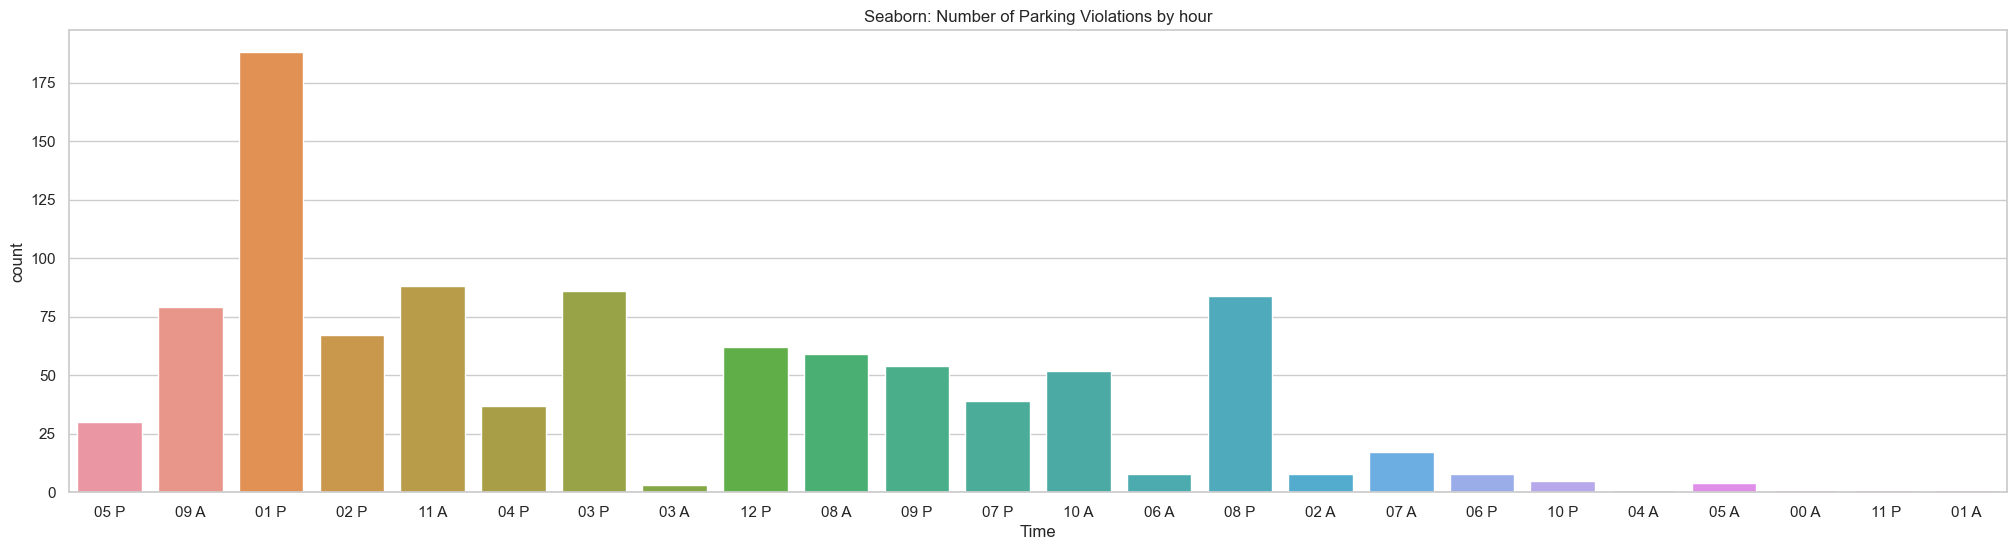

In [36]:
#as the time is in 12hour format and the column has AM and PM timing we merge both columns
data["Time"]=data["hour"]+" "+data["AM/PM"]
print(data['Time'].value_counts())
graphPlotFun(data,"Time","Number of Parking Violations by hour")

Especially time from 1pm to 3pm and 7am to 8am is experiencing thelarge number of parking violations

##4.What are the most common types of parking and camera violations?



PHTO SCHOOL ZN SPEED VIOLATION    351
NO PARKING-STREET CLEANING         73
FAIL TO DSPLY MUNI METER RECPT     70
NO STANDING-DAY/TIME LIMITS        56
FAILURE TO STOP AT RED LIGHT       49
BUS LANE VIOLATION                 46
FIRE HYDRANT                       43
DOUBLE PARKING                     40
NO PARKING-DAY/TIME LIMITS         32
NO STANDING-BUS STOP               26
REG. STICKER-EXPIRED/MISSING       26
INSP. STICKER-EXPIRED/MISSING      25
EXPIRED MUNI METER                 22
BIKE LANE                          17
FAIL TO DISP. MUNI METER RECPT     17
NO STANDING-EXC. TRUCK LOADING     17
PLTFRM LFTS LWRD POS COMM VEH      10
FRONT OR BACK PLATE MISSING         8
NO STANDING-COMM METER ZONE         7
NO STANDING-EXC. AUTH. VEHICLE      7
EXPIRED MUNI MTR-COMM MTR ZN        6
NO STANDING-BUS LANE                5
INSP STICKER-MUTILATED/C'FEIT       4
SIDEWALK                            4
NO STOPPING-DAY/TIME LIMITS         4
NGHT PKG ON RESID STR-COMM VEH      3
DOUBLE PARKI

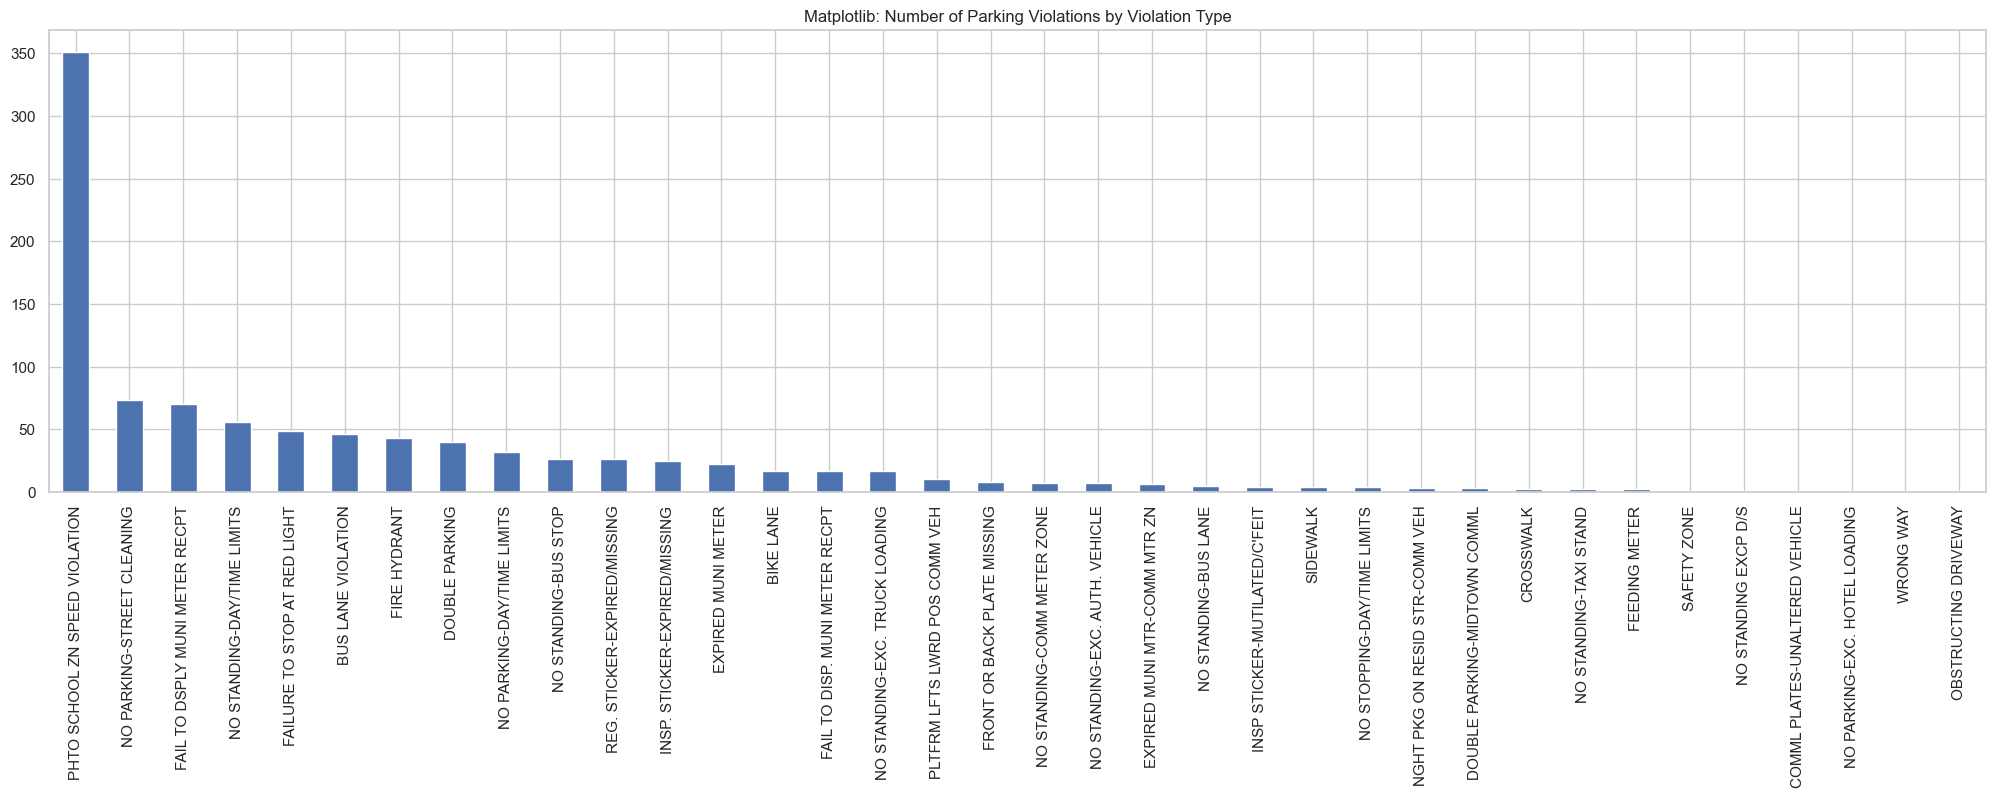

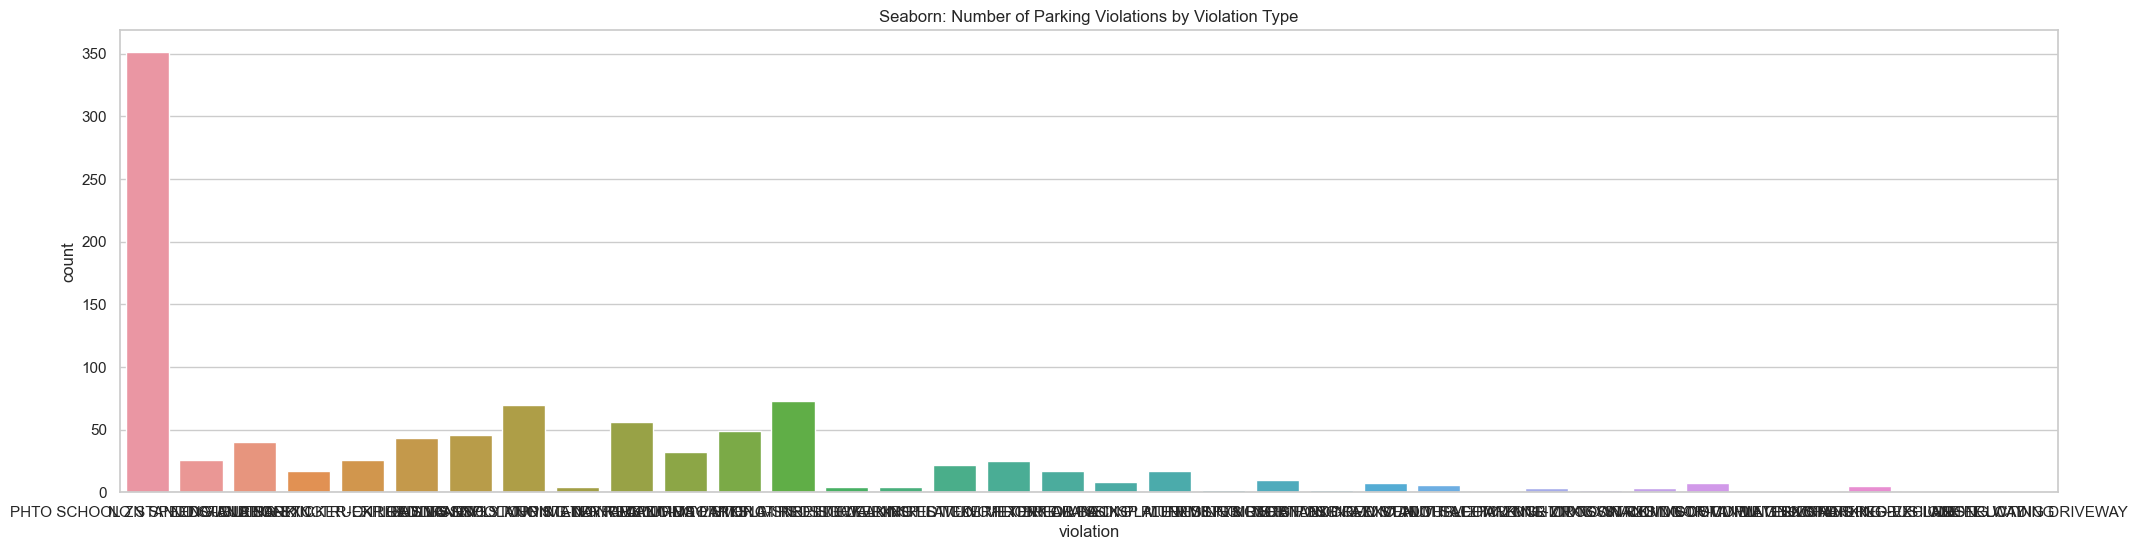

In [37]:
print(data['violation'].value_counts())
graphPlotFun(data,"violation","Number of Parking Violations by Violation Type")

The three common types of violations are as below:
1. PHTO SCHOOL ZN SPEED VIOLATION    
2. NO PARKING-STREET CLEANING      
3. FIRE HYDRANT     

##5.Do specific violation types tend to be associated with higher charges for violations?



In [38]:
result = data.groupby('violation').agg({'payment_amount': ['count', 'mean'], 'amount_due': 'mean'}).reset_index()

# Rename the columns for clarity
result.columns = ['Violation Type', 'Count of Violations', 'Average Payment Amount', 'Average Due Amount']

# Sort the result by the count of violations in descending order
result.sort_values(by='Count of Violations', ascending=False)


,Violation Type,Count of Violations,Average Payment Amount,Average Due Amount
30,PHTO SCHOOL ZN SPEED VIOLATION,351,54.390232,0.0
19,NO PARKING-STREET CLEANING,73,63.072192,0.0
9,FAIL TO DSPLY MUNI METER RECPT,70,35.656143,0.0
24,NO STANDING-DAY/TIME LIMITS,56,103.349643,0.0
10,FAILURE TO STOP AT RED LIGHT,49,70.432449,0.0
1,BUS LANE VIOLATION,46,99.174783,0.0
12,FIRE HYDRANT,43,120.305581,0.0
4,DOUBLE PARKING,40,75.781000,0.0
17,NO PARKING-DAY/TIME LIMITS,32,68.035313,0.0
32,REG. STICKER-EXPIRED/MISSING,26,57.150769,0.0


In [39]:
data.groupby('violation').agg({'payment_amount': 'mean', 'amount_due': 'mean'}).reset_index()


,violation,payment_amount,amount_due
0,BIKE LANE,107.941176,0.0
1,BUS LANE VIOLATION,99.174783,0.0
2,COMML PLATES-UNALTERED VEHICLE,115.000000,0.0
3,CROSSWALK,57.500000,0.0
4,DOUBLE PARKING,75.781000,0.0
5,DOUBLE PARKING-MIDTOWN COMML,100.000000,0.0
6,EXPIRED MUNI METER,52.360000,0.0
7,EXPIRED MUNI MTR-COMM MTR ZN,40.000000,0.0
8,FAIL TO DISP. MUNI METER RECPT,48.872941,0.0
9,FAIL TO DSPLY MUNI METER RECPT,35.656143,0.0


From the above it is clear that larger fine are not asociated with common type of violations.

Larger fines associated with the below type of violations:

1. SAFETY ZONE
2. NO STANDING-COMM METER ZONE
3. BIKE LANE

Also their frequency is also less

##6.What is the average payment amount, and amount due for these violations?

In [40]:
data.groupby('violation').agg({'payment_amount': ['count', 'mean']}).reset_index().sort_values(by=('payment_amount','mean'), ascending=False)


violation payment_amount            
                                            count        mean
23     NO STANDING-COMM METER ZONE              7  127.857143
12                    FIRE HYDRANT             43  120.305581
27          NO STANDING-TAXI STAND              2  120.000000
18   NO PARKING-EXC. HOTEL LOADING              1  115.000000
2   COMML PLATES-UNALTERED VEHICLE              1  115.000000
33                     SAFETY ZONE              1  115.000000
28     NO STOPPING-DAY/TIME LIMITS              4  113.750000
21            NO STANDING-BUS LANE              5  112.000000
0                        BIKE LANE             17  107.941176
22            NO STANDING-BUS STOP             26  106.730769
24     NO STANDING-DAY/TIME LIMITS             56  103.349643
5     DOUBLE PARKING-MIDTOWN COMML              3  100.000000
1               BUS LANE VIOLATION             46   99.174783
29            OBSTRUCTING DRIVEWAY              1   95.000000
20            NO STANDING EXCP D/S              1   95.000000
25  NO STANDING-EXC. AUTH. VEHICLE              7   91.428571
34                        SIDEWALK              4   88.750000
26  NO STANDING-EXC. TRUCK LOADING             17   86.764706
4                   DOUBLE PARKING             40   75.781000
15   INSP. STICKER-EXPIRED/MISSING             25   74.086000
10    FAILURE TO STOP AT RED LIGHT             49   70.432449
17      NO PARKING-DAY/TIME LIMITS             32   68.035313
19      NO PARKING-STREET CLEANING             73   63.072192
14   INSP STICKER-MUTILATED/C'FEIT              4   58.750000
13     FRONT OR BACK PLATE MISSING              8   58.125000
3                        CROSSWALK              2   57.500000
32    REG. STICKER-EXPIRED/MISSING             26   57.150769
16  NGHT PKG ON RESID STR-COMM VEH              3   56.666667
30  PHTO SCHOOL ZN SPEED VIOLATION            351   54.390232
6               EXPIRED MUNI METER             22   52.360000
8   FAIL TO DISP. MUNI METER RECPT             17   48.872941
35                       WRONG WAY              1   45.000000
31   PLTFRM LFTS LWRD POS COMM VEH             10   43.917000
7     EXPIRED MUNI MTR-COMM MTR ZN              6   40.000000
9   FAIL TO DSPLY MUNI METER RECPT             70   35.656143
11                   FEEDING METER              2   32.500000

Average Payment amount for violation : PHTO SCHOOL ZN SPEED VIOLATION is 49.87USD and average due amount is 0.185

#5.Conclusion
The  Data Analysis of the "Open Parking and Camera Violations" dataset reveals that New York and New Jersey have the highest number of parking violations, with New York and the Bronx counties showing the most violations. Peak violation times occur between 7 AM to 8 AM and 1 PM to 11 PM, and July and August experience heightened violations, possibly due to seasonal factors. The Traffic Department and the Department of Transportation are the primary enforcers. These findings offer valuable insights to government agencies, enabling more efficient resource allocation, informed policy adjustments, revenue generation, increased public awareness, and improved traffic flow, ultimately contributing to more effective parking regulation and transportation management.

#6.References:


    https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89
    
    https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
    
    https://medium.com/towardsdev/320-python-and-data-science-tips-covering-pandas-numpy-ml-basics-sklearn-jupyter-and-more-83e870b5f0e4

    https://medium.com/@michael71314/python-lesson-29-more-things-you-can-do-with-matplotlib-bar-charts-matplotlib-pt-2-6db863ffb864